## MLP / Dense Networks

For this section we’ll be using an asteroids dataset.This dataset contains information from different asteroids that have passed or will pass (1900 - 2200) close or relatively close to the Earth. The main objective is to classify asteroids according rarity.


In [ ]:
# Librería seaborn para visualizaciones + dataset
import seaborn as sns
# Library load
import os
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sn
import matplotlib.pyplot as plt

# Funciones para hacer cálculo estadístico
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Carga del dataset desde arhivo csv
raw_data = pd.read_csv('NEO_Earth_Close_Approaches.csv', delimiter = ',')
print("Tipo de variable: ", type(raw_data))

Tipo de variable:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Visualizamos los primeros 5 registros 
raw_data.head()


Object      Close-Approach (CA) Date  \
0       509352 (2007 AG)  1900-Jan-04 22:25 ±    00:02   
1           (2014 SC324)  1900-Jan-11 01:07 ±    00:18   
2           (2012 UK171)  1900-Jan-12 23:07 ±    00:13   
3  4660 Nereus (1982 DB)  1900-Jan-29 18:10 ±    00:35   
4            (2015 RW83)  1900-Feb-04 03:50 ±    14:49   

   CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
0                  0.00963                  0.00962              8.69   
1                  0.03997                  0.03991             10.65   
2                  0.04982                  0.04950              7.16   
3                  0.02080                  0.02077              5.54   
4                  0.03312                  0.03258              3.14   

   V infinity(km/s)  H(mag)        Diameter  Rarity  
0              8.65    20.2  250 m -  550 m     2.0  
1             10.65    24.3   37 m -   82 m     0.0  
2              7.15    24.4   34 m -   77 m     0.0  
3              5.52    18.6    0.33±0.05 km     2.0  
4              3.12    24.1   40 m -   90 m     0.0

## Info de dominio

La "información de dominio" se refiere a los conocimientos y la comprensión que un experto en un campo determinado tiene sobre el problema que se está intentando resolver. Esta información puede ser crucial para realizar una análisis de datos efectivo y para tomar decisiones informadas basadas en los resultados del análisis.

Object: El nombre o designación del objeto (asteroide o cometa).

Close Approach Date: La fecha y hora (en UTC) en la que se producirá la aproximación cercana a la Tierra.

CA DistanceNominal (au): La distancia de acercamiento más probable (del centro de la Tierra al centro de NEO), en unidades astronómicas.

CA DistanceMinimum (au): La distancia de aproximación mínima posible (centro de la Tierra al centro NEO), en unidades astronómicas.

V relative(km/s): Velocidad del objeto relativa a la Tierra en aproximación cercana

V infinity(km/s): Velocidad del objeto relativa a la Tierra sin masa en aproximación cercana.

H(mag): Magnitud absoluta del asteroide (en general, H más pequeña implica un diámetro de asteroide más grande). Indefinido para cometas.

Diameter: Diámetro cuando se conoce. De lo contrario, el diámetro se estima como un rango usando H y albedos limitantes 0.25, 0.05. El "albedo" es una medida de la reflectividad de una superficie. En astronomía, se utiliza para describir la fracción de la radiación solar que es reflejada por un cuerpo celeste, como un planeta, un asteroide o un cometa. Cuanto mayor sea el albedo de un objeto, mayor será su capacidad para reflejar la luz solar.

Rarity: Una medida de cuán poco frecuente es el acercamiento cercano a la Tierra para asteroides del mismo tamaño y más grandes: 0 significa una frecuencia promedio de 100 por año, es decir, aproximadamente cada pocos días o menos, 1 corresponde a aproximadamente una vez al mes, 2 a aproximadamente una vez al año, de 3 a aproximadamente una vez por década, etc. 'n/a' significa que no se dispone de una estimación de frecuencia.

In [ ]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(raw_data))
print("Tamaño del dataset: ", raw_data.shape)

Cantidad de registros:  35899
Tamaño del dataset:  (35899, 9)


In [ ]:
# tipos de datos en el dataframe
data_types = raw_data.dtypes

# display the data types of each column
print(data_types)

Object                       object
Close-Approach (CA) Date     object
CA DistanceNominal (au)     float64
CA DistanceMinimum (au)     float64
V relative(km/s)            float64
V infinity(km/s)            float64
H(mag)                      float64
Diameter                     object
Rarity                      float64
dtype: object


In [ ]:
# Evaluamos cuántos registros tienen valores nulos por variable
raw_data.isna().sum()

Object                       0
Close-Approach (CA) Date     0
CA DistanceNominal (au)      0
CA DistanceMinimum (au)      0
V relative(km/s)             0
V infinity(km/s)            22
H(mag)                       9
Diameter                     8
Rarity                       9
dtype: int64

Se encuentran registros nulos para las variables V infinity, H, Diameter y Rarity.

In [ ]:
# Create a boolean mask of null values
mask = raw_data.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = raw_data[mask]

# Print the null rows
print(null_rows)  

                             Object      Close-Approach (CA) Date  \
1379                  289P/Blanpain  1919-Dec-09 03:23 ±    17:35   
1928               7P/Pons-Winnecke   1927-Jun-26 19:36 ± < 00:01   
3607                      322P/SOHO  1947-Apr-11 04:00 ±    02:19   
5580                    (2012 TF79)   1967-Jan-20 03:00 ± 4_00:34   
8805               P/1999 J6 (SOHO)  1999-Jun-12 05:23 ±    05:55   
9467                  289P/Blanpain  2003-Dec-12 01:21 ±    00:29   
10111                  (2006 RH120)   2006-Sep-11 07:40 ± < 00:01   
10209                  (2006 RH120)   2007-Jan-03 18:02 ± < 00:01   
10281                  (2006 RH120)   2007-Mar-25 12:32 ± < 00:01   
10320                  (2006 RH120)   2007-Jun-14 05:31 ± < 00:01   
14090                   252P/LINEAR   2016-Mar-21 13:16 ± < 00:01   
14093       P/2016 BA14 (PANSTARRS)   2016-Mar-22 15:31 ± < 00:01   
15158                    (2020 CD3)   2017-Sep-18 06:00 ± < 00:01   
15476                    (2020 CD3

Al ser H, Diameter y Rarity columnas con 8 registros coincidentes sin información, vamos a eliminarlos. Ya que representan un 0,02 % de la información, siendo no muy significante.

H(mag)                       9

Diameter                     8

Rarity                       9



In [ ]:
raw_data.drop([1379, 3607, 8805, 9467, 14090, 14093, 26164, 30738], inplace=True)

In [ ]:
# Create a boolean mask of null values
mask = raw_data.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = raw_data[mask]

# Print the null rows
print(null_rows)

                 Object      Close-Approach (CA) Date  \
1928   7P/Pons-Winnecke   1927-Jun-26 19:36 ± < 00:01   
5580        (2012 TF79)   1967-Jan-20 03:00 ± 4_00:34   
10111      (2006 RH120)   2006-Sep-11 07:40 ± < 00:01   
10209      (2006 RH120)   2007-Jan-03 18:02 ± < 00:01   
10281      (2006 RH120)   2007-Mar-25 12:32 ± < 00:01   
10320      (2006 RH120)   2007-Jun-14 05:31 ± < 00:01   
15158        (2020 CD3)   2017-Sep-18 06:00 ± < 00:01   
15476        (2020 CD3)   2017-Dec-06 09:22 ± < 00:01   
15691        (2020 CD3)   2018-Feb-19 08:28 ± < 00:01   
15902        (2020 CD3)   2018-May-09 13:48 ± < 00:01   
16058        (2020 CD3)   2018-Aug-09 12:37 ± < 00:01   
16284        (2020 CD3)   2018-Oct-26 00:10 ± < 00:01   
16535        (2020 CD3)   2019-Jan-16 17:12 ± < 00:01   
16782        (2020 CD3)   2019-Apr-04 09:33 ± < 00:01   
17020        (2020 CD3)   2019-Jun-30 17:27 ± < 00:01   
17175        (2020 CD3)   2019-Sep-10 04:00 ± < 00:01   
17537        (2020 CD3)   2019-

Se transforma Diámetro a variable numérica float para poder trabajarlo, se separa en mínimo y máximo diámetro. 

In [ ]:
# Split the "diameter" column into two columns based on "-" or "±":
raw_data[['Min_diameter', 'Max_diameter']] = raw_data['Diameter'].str.split('[-±]', expand=True)

# Strip any leading/trailing whitespace from the columns:
raw_data['Min_diameter'] = raw_data['Min_diameter'].str.strip()
raw_data['Max_diameter'] = raw_data['Max_diameter'].str.strip()

In [ ]:
raw_data

Object      Close-Approach (CA) Date  \
0           509352 (2007 AG)  1900-Jan-04 22:25 ±    00:02   
1               (2014 SC324)  1900-Jan-11 01:07 ±    00:18   
2               (2012 UK171)  1900-Jan-12 23:07 ±    00:13   
3      4660 Nereus (1982 DB)  1900-Jan-29 18:10 ±    00:35   
4                (2015 RW83)  1900-Feb-04 03:50 ±    14:49   
...                      ...                           ...   
35894             (2017 UH5)  2200-Oct-29 07:16 ±    00:02   
35895      475534 (2006 TS7)   2200-Nov-01 07:43 ± < 00:01   
35896      413577 (2005 UL5)  2200-Nov-23 02:10 ±    00:09   
35897           (2014 WT202)  2200-Nov-23 03:36 ±    00:04   
35898     163696 (2003 EB50)   2200-Nov-26 06:30 ± < 00:01   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
0                      0.00963                  0.00962              8.69   
1                      0.03997                  0.03991             10.65   
2                      0.04982                  0.04950              7.16   
3                      0.02080                  0.02077              5.54   
4                      0.03312                  0.03258              3.14   
...                        ...                      ...               ...   
35894                  0.04891                  0.04890              6.60   
35895                  0.01148                  0.01148             17.73   
35896                  0.01482                  0.01457             18.17   
35897                  0.04197                  0.04170             12.00   
35898                  0.04643                  0.04643             21.34   

       V infinity(km/s)  H(mag)          Diameter  Rarity Min_diameter  \
0                  8.65    20.2    250 m -  550 m     2.0        250 m   
1                 10.65    24.3     37 m -   82 m     0.0         37 m   
2                  7.15    24.4     34 m -   77 m     0.0         34 m   
3                  5.52    18.6      0.33±0.05 km     2.0         0.33   
4                  3.12    24.1     40 m -   90 m     0.0         40 m   
...                 ...     ...               ...     ...          ...   
35894              6.59    26.6     13 m -   28 m     0.0         13 m   
35895             17.72    21.3    150 m -  330 m     2.0        150 m   
35896             18.16    20.3    230 m -  510 m     2.0        230 m   
35897             11.99    21.1    160 m -  360 m     1.0        160 m   
35898             21.34    16.4  1.4 km -  3.1 km     2.0       1.4 km   

      Max_diameter  
0            550 m  
1             82 m  
2             77 m  
3          0.05 km  
4             90 m  
...            ...  
35894         28 m  
35895        330 m  
35896        510 m  
35897        360 m  
35898       3.1 km  

[35891 rows x 11 columns]

In [ ]:
raw_data['Min_diameter'] = raw_data['Min_diameter'].str.replace('m', '').str.replace('km', '').str.replace('k', '').astype(float)
raw_data['Max_diameter'] = raw_data['Max_diameter'].str.replace('m', '').str.replace('km', '').str.replace('k', '').astype(float)

In [ ]:
raw_data

Object      Close-Approach (CA) Date  \
0           509352 (2007 AG)  1900-Jan-04 22:25 ±    00:02   
1               (2014 SC324)  1900-Jan-11 01:07 ±    00:18   
2               (2012 UK171)  1900-Jan-12 23:07 ±    00:13   
3      4660 Nereus (1982 DB)  1900-Jan-29 18:10 ±    00:35   
4                (2015 RW83)  1900-Feb-04 03:50 ±    14:49   
...                      ...                           ...   
35894             (2017 UH5)  2200-Oct-29 07:16 ±    00:02   
35895      475534 (2006 TS7)   2200-Nov-01 07:43 ± < 00:01   
35896      413577 (2005 UL5)  2200-Nov-23 02:10 ±    00:09   
35897           (2014 WT202)  2200-Nov-23 03:36 ±    00:04   
35898     163696 (2003 EB50)   2200-Nov-26 06:30 ± < 00:01   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
0                      0.00963                  0.00962              8.69   
1                      0.03997                  0.03991             10.65   
2                      0.04982                  0.04950              7.16   
3                      0.02080                  0.02077              5.54   
4                      0.03312                  0.03258              3.14   
...                        ...                      ...               ...   
35894                  0.04891                  0.04890              6.60   
35895                  0.01148                  0.01148             17.73   
35896                  0.01482                  0.01457             18.17   
35897                  0.04197                  0.04170             12.00   
35898                  0.04643                  0.04643             21.34   

       V infinity(km/s)  H(mag)          Diameter  Rarity  Min_diameter  \
0                  8.65    20.2    250 m -  550 m     2.0        250.00   
1                 10.65    24.3     37 m -   82 m     0.0         37.00   
2                  7.15    24.4     34 m -   77 m     0.0         34.00   
3                  5.52    18.6      0.33±0.05 km     2.0          0.33   
4                  3.12    24.1     40 m -   90 m     0.0         40.00   
...                 ...     ...               ...     ...           ...   
35894              6.59    26.6     13 m -   28 m     0.0         13.00   
35895             17.72    21.3    150 m -  330 m     2.0        150.00   
35896             18.16    20.3    230 m -  510 m     2.0        230.00   
35897             11.99    21.1    160 m -  360 m     1.0        160.00   
35898             21.34    16.4  1.4 km -  3.1 km     2.0          1.40   

       Max_diameter  
0            550.00  
1             82.00  
2             77.00  
3              0.05  
4             90.00  
...             ...  
35894         28.00  
35895        330.00  
35896        510.00  
35897        360.00  
35898          3.10  

[35891 rows x 11 columns]

In [ ]:
# Split the values in the Diameter column by space and take the last element as the unit of measurement
unit = raw_data['Diameter'].str.split().str[-1]

# Add the unit of measurement as a new column
raw_data['Unit'] = unit

In [ ]:
# Create a boolean mask of null values
mask = raw_data.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = raw_data[mask]

# Print the null rows
print(null_rows)

                            Object      Close-Approach (CA) Date  \
54                  8014 (1990 MF)  1900-Sep-27 07:40 ±    00:17   
167      25143 Itokawa (1998 SF36)  1902-Apr-14 17:08 ±    00:19   
319                    (1998 KY26)   1904-Jun-02 23:16 ± 2_02:41   
392      25143 Itokawa (1998 SF36)   1905-Jun-27 00:24 ± < 00:01   
441    1915 Quetzalcoatl (1953 EA)  1906-Mar-06 00:36 ±    00:07   
...                            ...                           ...   
35518      4769 Castalia (1989 PB)   2192-Aug-26 04:06 ± < 00:01   
35590       3361 Orpheus (1982 HR)   2194-Apr-15 04:06 ± < 00:01   
35665             162000 (1990 OS)  2195-Nov-21 07:54 ±    00:26   
35689    25143 Itokawa (1998 SF36)  2196-Apr-13 03:22 ±    00:24   
35784       3361 Orpheus (1982 HR)   2198-Apr-16 21:24 ± < 00:01   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
54                     0.04467                  0.04458              9.99   
167                    0.0400

Tenemos aún más valores nulos en Max_diameter, que lo imputaremos con el mismo valor de Min_diameter, ya que no existía un rango.

In [ ]:
raw_data['Max_diameter'] = raw_data['Max_diameter'].fillna(raw_data['Min_diameter'])

In [ ]:
raw_data

Object      Close-Approach (CA) Date  \
0           509352 (2007 AG)  1900-Jan-04 22:25 ±    00:02   
1               (2014 SC324)  1900-Jan-11 01:07 ±    00:18   
2               (2012 UK171)  1900-Jan-12 23:07 ±    00:13   
3      4660 Nereus (1982 DB)  1900-Jan-29 18:10 ±    00:35   
4                (2015 RW83)  1900-Feb-04 03:50 ±    14:49   
...                      ...                           ...   
35894             (2017 UH5)  2200-Oct-29 07:16 ±    00:02   
35895      475534 (2006 TS7)   2200-Nov-01 07:43 ± < 00:01   
35896      413577 (2005 UL5)  2200-Nov-23 02:10 ±    00:09   
35897           (2014 WT202)  2200-Nov-23 03:36 ±    00:04   
35898     163696 (2003 EB50)   2200-Nov-26 06:30 ± < 00:01   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
0                      0.00963                  0.00962              8.69   
1                      0.03997                  0.03991             10.65   
2                      0.04982                  0.04950              7.16   
3                      0.02080                  0.02077              5.54   
4                      0.03312                  0.03258              3.14   
...                        ...                      ...               ...   
35894                  0.04891                  0.04890              6.60   
35895                  0.01148                  0.01148             17.73   
35896                  0.01482                  0.01457             18.17   
35897                  0.04197                  0.04170             12.00   
35898                  0.04643                  0.04643             21.34   

       V infinity(km/s)  H(mag)          Diameter  Rarity  Min_diameter  \
0                  8.65    20.2    250 m -  550 m     2.0        250.00   
1                 10.65    24.3     37 m -   82 m     0.0         37.00   
2                  7.15    24.4     34 m -   77 m     0.0         34.00   
3                  5.52    18.6      0.33±0.05 km     2.0          0.33   
4                  3.12    24.1     40 m -   90 m     0.0         40.00   
...                 ...     ...               ...     ...           ...   
35894              6.59    26.6     13 m -   28 m     0.0         13.00   
35895             17.72    21.3    150 m -  330 m     2.0        150.00   
35896             18.16    20.3    230 m -  510 m     2.0        230.00   
35897             11.99    21.1    160 m -  360 m     1.0        160.00   
35898             21.34    16.4  1.4 km -  3.1 km     2.0          1.40   

       Max_diameter Unit  
0            550.00    m  
1             82.00    m  
2             77.00    m  
3              0.05   km  
4             90.00    m  
...             ...  ...  
35894         28.00    m  
35895        330.00    m  
35896        510.00    m  
35897        360.00    m  
35898          3.10   km  

[35891 rows x 12 columns]

In [ ]:
# Create a boolean mask of null values
mask = raw_data.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = raw_data[mask]

# Print the null rows
print(null_rows)

                 Object      Close-Approach (CA) Date  \
1928   7P/Pons-Winnecke   1927-Jun-26 19:36 ± < 00:01   
5580        (2012 TF79)   1967-Jan-20 03:00 ± 4_00:34   
10111      (2006 RH120)   2006-Sep-11 07:40 ± < 00:01   
10209      (2006 RH120)   2007-Jan-03 18:02 ± < 00:01   
10281      (2006 RH120)   2007-Mar-25 12:32 ± < 00:01   
10320      (2006 RH120)   2007-Jun-14 05:31 ± < 00:01   
15158        (2020 CD3)   2017-Sep-18 06:00 ± < 00:01   
15476        (2020 CD3)   2017-Dec-06 09:22 ± < 00:01   
15691        (2020 CD3)   2018-Feb-19 08:28 ± < 00:01   
15902        (2020 CD3)   2018-May-09 13:48 ± < 00:01   
16058        (2020 CD3)   2018-Aug-09 12:37 ± < 00:01   
16284        (2020 CD3)   2018-Oct-26 00:10 ± < 00:01   
16535        (2020 CD3)   2019-Jan-16 17:12 ± < 00:01   
16782        (2020 CD3)   2019-Apr-04 09:33 ± < 00:01   
17020        (2020 CD3)   2019-Jun-30 17:27 ± < 00:01   
17175        (2020 CD3)   2019-Sep-10 04:00 ± < 00:01   
17537        (2020 CD3)   2019-

In [ ]:
# tipos de datos en el dataframe
data_types = raw_data.dtypes

# display the data types of each column
print(data_types)

Object                       object
Close-Approach (CA) Date     object
CA DistanceNominal (au)     float64
CA DistanceMinimum (au)     float64
V relative(km/s)            float64
V infinity(km/s)            float64
H(mag)                      float64
Diameter                     object
Rarity                      float64
Min_diameter                float64
Max_diameter                float64
Unit                         object
dtype: object


Una vez corregido el tipo de datos, seguimos con los valores nulos. Existe un registro que no tiene H ni Rarity. Buscaremos un asteroide de tamaño similar entre 5 y 5.5 km para imputar datos por similitud. El diámetro se estima como un rango usando H y albedos limitantes 0.25, 0.05. En este caso tampoco tenemos H, pero al ver el caso similar de Object:4179 Toutatis (1989 AC),  H es igual a 15.3 y Rarity es 3 o 4. Por lo que imputaremos los valores de 15.3 para H y Rarity como 3, considerando la distancia nominal de 0.03543 cercana a 0.03938 de 7P/Pons-Winnecke.

V infinity(km/s)  H(mag)        Diameter  Rarity  

1928               13.9     NaN          5.2 km     NaN  

In [ ]:
raw_data[(raw_data['Max_diameter'] >= 5.0) & (raw_data['Max_diameter'] <= 5.5) & (raw_data['Unit'] == 'km')]

Object     Close-Approach (CA) Date  \
1928          7P/Pons-Winnecke  1927-Jun-26 19:36 ± < 00:01   
8166   4179 Toutatis (1989 AC)  1992-Dec-08 05:36 ± < 00:01   
8534   4179 Toutatis (1989 AC)  1996-Nov-29 22:53 ± < 00:01   
9656   4179 Toutatis (1989 AC)  2004-Sep-29 13:37 ± < 00:01   
12289  4179 Toutatis (1989 AC)  2012-Dec-12 06:40 ± < 00:01   
27126  4179 Toutatis (1989 AC)  2069-Nov-05 15:50 ± < 00:01   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
1928                   0.03938                  0.03938             13.91   
8166                   0.02415                  0.02415             11.19   
8534                   0.03543                  0.03543             10.18   
9656                   0.01036                  0.01036             11.00   
12289                  0.04633                  0.04633             11.91   
27126                  0.01985                  0.01985              8.41   

       V infinity(km/s)  H(mag) Diameter  Rarity  Min_diameter  Max_diameter  \
1928              13.90     NaN   5.2 km     NaN           5.2           5.2   
8166              11.18    15.3   5.4 km     4.0           5.4           5.4   
8534              10.18    15.3   5.4 km     3.0           5.4           5.4   
9656              10.97    15.3   5.4 km     4.0           5.4           5.4   
12289             11.91    15.3   5.4 km     3.0           5.4           5.4   
27126              8.39    15.3   5.4 km     4.0           5.4           5.4   

      Unit  
1928    km  
8166    km  
8534    km  
9656    km  
12289   km  
27126   km

In [ ]:
# Locate the row corresponding to the object with ID 1927 (1928)
row_index = raw_data.index[1927]
row_index

1928

In [ ]:
# Update the H and Rarity values for the row
raw_data.at[row_index, 'H(mag)'] = 15.3
raw_data.at[row_index, 'Rarity'] = 3

In [ ]:
raw_data[(raw_data['Max_diameter'] >= 5.0) & (raw_data['Max_diameter'] <= 5.5) & (raw_data['Unit'] == 'km')]

Object     Close-Approach (CA) Date  \
1928          7P/Pons-Winnecke  1927-Jun-26 19:36 ± < 00:01   
8166   4179 Toutatis (1989 AC)  1992-Dec-08 05:36 ± < 00:01   
8534   4179 Toutatis (1989 AC)  1996-Nov-29 22:53 ± < 00:01   
9656   4179 Toutatis (1989 AC)  2004-Sep-29 13:37 ± < 00:01   
12289  4179 Toutatis (1989 AC)  2012-Dec-12 06:40 ± < 00:01   
27126  4179 Toutatis (1989 AC)  2069-Nov-05 15:50 ± < 00:01   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
1928                   0.03938                  0.03938             13.91   
8166                   0.02415                  0.02415             11.19   
8534                   0.03543                  0.03543             10.18   
9656                   0.01036                  0.01036             11.00   
12289                  0.04633                  0.04633             11.91   
27126                  0.01985                  0.01985              8.41   

       V infinity(km/s)  H(mag) Diameter  Rarity  Min_diameter  Max_diameter  \
1928              13.90    15.3   5.2 km     3.0           5.2           5.2   
8166              11.18    15.3   5.4 km     4.0           5.4           5.4   
8534              10.18    15.3   5.4 km     3.0           5.4           5.4   
9656              10.97    15.3   5.4 km     4.0           5.4           5.4   
12289             11.91    15.3   5.4 km     3.0           5.4           5.4   
27126              8.39    15.3   5.4 km     4.0           5.4           5.4   

      Unit  
1928    km  
8166    km  
8534    km  
9656    km  
12289   km  
27126   km

Aún seguimos con valores nulos en objetos que se repiten: (2012 TF79), (2006 RH120), (2020 CD3), (2022 NX1), (2006 RH120), (2020 CD3) 

In [ ]:
# Create a boolean mask of null values
mask = raw_data.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = raw_data[mask]

# Print the null rows
print(null_rows)

             Object      Close-Approach (CA) Date  CA DistanceNominal (au)  \
5580    (2012 TF79)   1967-Jan-20 03:00 ± 4_00:34                  0.03550   
10111  (2006 RH120)   2006-Sep-11 07:40 ± < 00:01                  0.00561   
10209  (2006 RH120)   2007-Jan-03 18:02 ± < 00:01                  0.00357   
10281  (2006 RH120)   2007-Mar-25 12:32 ± < 00:01                  0.00236   
10320  (2006 RH120)   2007-Jun-14 05:31 ± < 00:01                  0.00185   
15158    (2020 CD3)   2017-Sep-18 06:00 ± < 00:01                  0.00134   
15476    (2020 CD3)   2017-Dec-06 09:22 ± < 00:01                  0.00166   
15691    (2020 CD3)   2018-Feb-19 08:28 ± < 00:01                  0.00149   
15902    (2020 CD3)   2018-May-09 13:48 ± < 00:01                  0.00017   
16058    (2020 CD3)   2018-Aug-09 12:37 ± < 00:01                  0.00204   
16284    (2020 CD3)   2018-Oct-26 00:10 ± < 00:01                  0.00215   
16535    (2020 CD3)   2019-Jan-16 17:12 ± < 00:01               

In [ ]:
raw_data[raw_data['Object'].isin(['(2012 TF79)', '(2006 RH120)', '(2020 CD3)', '(2022 NX1)', '(2006 RH120)', '(2020 CD3)'])]

Object      Close-Approach (CA) Date  CA DistanceNominal (au)  \
1540    (2012 TF79)   1922-Sep-12 08:25 ± 3_18:18                  0.04890   
5137     (2022 NX1)   1962-Aug-03 11:19 ± 2_06:11                  0.04100   
5580    (2012 TF79)   1967-Jan-20 03:00 ± 4_00:34                  0.03550   
5827   (2006 RH120)   1969-May-03 07:24 ± 6_06:40                  0.04292   
6864   (2006 RH120)   1979-May-15 23:22 ± 1_11:25                  0.01379   
6985     (2022 NX1)   1980-Jul-08 12:26 ± 2_15:49                  0.01451   
7042     (2022 NX1)  1981-Jan-16 15:22 ±    01:38                  0.00417   
7536     (2020 CD3)   1985-Dec-21 08:57 ± 1_23:09                  0.01663   
7569     (2020 CD3)   1986-Apr-13 14:31 ± 3_02:02                  0.01387   
8632    (2012 TF79)  1997-Nov-26 09:42 ±    13:56                  0.03165   
10111  (2006 RH120)   2006-Sep-11 07:40 ± < 00:01                  0.00561   
10209  (2006 RH120)   2007-Jan-03 18:02 ± < 00:01                  0.00357   
10281  (2006 RH120)   2007-Mar-25 12:32 ± < 00:01                  0.00236   
10320  (2006 RH120)   2007-Jun-14 05:31 ± < 00:01                  0.00185   
12207   (2012 TF79)   2012-Oct-19 04:44 ± < 00:01                  0.04442   
15158    (2020 CD3)   2017-Sep-18 06:00 ± < 00:01                  0.00134   
15476    (2020 CD3)   2017-Dec-06 09:22 ± < 00:01                  0.00166   
15691    (2020 CD3)   2018-Feb-19 08:28 ± < 00:01                  0.00149   
15902    (2020 CD3)   2018-May-09 13:48 ± < 00:01                  0.00017   
16058    (2020 CD3)   2018-Aug-09 12:37 ± < 00:01                  0.00204   
16284    (2020 CD3)   2018-Oct-26 00:10 ± < 00:01                  0.00215   
16535    (2020 CD3)   2019-Jan-16 17:12 ± < 00:01                  0.00108   
16782    (2020 CD3)   2019-Apr-04 09:33 ± < 00:01                  0.00009   
17020    (2020 CD3)   2019-Jun-30 17:27 ± < 00:01                  0.00185   
17175    (2020 CD3)   2019-Sep-10 04:00 ± < 00:01                  0.00202   
17537    (2020 CD3)   2019-Nov-18 13:04 ± < 00:01                  0.00194   
17895    (2020 CD3)   2020-Feb-13 16:20 ± < 00:01                  0.00031   
21464    (2022 NX1)   2022-Jun-26 20:23 ± < 00:01                  0.00543   
22984   (2012 TF79)  2027-Feb-26 11:20 ±    12:45                  0.03288   
23106  (2006 RH120)   2028-Aug-18 13:41 ± 4_02:14                  0.02686   
23125  (2006 RH120)   2028-Oct-09 03:14 ± 3_20:22                  0.02707   
24346   (2012 TF79)   2042-Mar-10 07:37 ± 3_06:59                  0.03241   
24505  (2006 RH120)   2043-Nov-12 09:11 ± 6_05:33                  0.01019   
24529    (2020 CD3)  2044-Mar-20 10:43 ±    00:36                  0.02444   
25211    (2022 NX1)  2051-Dec-04 21:43 ±    01:51                  0.00303   
26256    (2020 CD3)  2061-Aug-20 04:39 ±    13:21                  0.03324   
27460   (2012 TF79)   2073-Feb-22 18:29 ± 5_22:13                  0.03091   

       CA DistanceMinimum (au)  V relative(km/s)  V infinity(km/s)  H(mag)  \
1540                   0.04730              0.77              0.70    27.4   
5137                   0.02384              1.41              1.36    28.1   
5580                   0.03502              0.28               NaN    27.4   
5827                   0.00110              1.73              1.70    29.5   
6864                   0.01189              0.77              0.45    29.5   
6985                   0.01412              0.69              0.34    28.1   
7042                   0.00415              1.15              0.22    28.1   
7536                   0.01410              0.86              0.65    31.7   
7569                   0.01357              0.72              0.36    31.7   
8632                   0.03156              0.52              0.31    27.4   
10111                  0.00561              0.86               NaN    29.5   
10209                  0.00357              1.04               NaN    29.5   
10281                  0.00236    

Para el resto de los datos que tienen variables NaN, se imputará la media de V infinity(km/s) de acuerdo a sus vueltas. La imputación por la media o la mediana es la más sencilla de todas, simplemente se toman los valores conocidos en la variable donde están los datos faltantes, se calculan la media o la mediana y se reemplazan los datos faltantes con cualquiera de estos dos valores. Aunque es muy fácil de implementar, este método tiene la desventaja de que al reemplazar muchos datos faltantes con un único valor estaremos cambiando la distribución de los datos. Aunque para este caso particular son solo 22 muestras de 35899, siendo soólo 0,06 % lo cual no afectará en gran medida la distribución de los datos.

In [ ]:
# group the data by object and calculate the mean for each group
grouped_data = raw_data.groupby('Object')['V infinity(km/s)'].mean()
grouped_data

Object
(1979 XB)                   23.0200
(1990 UN)                   12.0700
(1991 BA)                   17.7600
(1991 GO)                   18.6180
(1991 JR)                    6.8800
                             ...   
90403 (2003 YE45)           12.5380
90416 (2003 YK118)          11.5900
9856 (1991 EE)              16.3300
99248 (2001 KY66)           11.8800
99942 Apophis (2004 MN4)     5.9675
Name: V infinity(km/s), Length: 13841, dtype: float64

In [ ]:
# fill in the missing values with the mean for each group
raw_data['V infinity(km/s)'] = raw_data.groupby('Object')['V infinity(km/s)'].apply(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_14318/2417108561.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  raw_data['V infinity(km/s)'] = raw_data.groupby('Object')['V infinity(km/s)'].apply(lambda x: x.fillna(x.mean()))


In [ ]:
raw_data[raw_data['Object'].isin(['(2012 TF79)', '(2006 RH120)', '(2020 CD3)', '(2022 NX1)', '(2006 RH120)', '(2020 CD3)'])]

Object      Close-Approach (CA) Date  CA DistanceNominal (au)  \
1540    (2012 TF79)   1922-Sep-12 08:25 ± 3_18:18                  0.04890   
5137     (2022 NX1)   1962-Aug-03 11:19 ± 2_06:11                  0.04100   
5580    (2012 TF79)   1967-Jan-20 03:00 ± 4_00:34                  0.03550   
5827   (2006 RH120)   1969-May-03 07:24 ± 6_06:40                  0.04292   
6864   (2006 RH120)   1979-May-15 23:22 ± 1_11:25                  0.01379   
6985     (2022 NX1)   1980-Jul-08 12:26 ± 2_15:49                  0.01451   
7042     (2022 NX1)  1981-Jan-16 15:22 ±    01:38                  0.00417   
7536     (2020 CD3)   1985-Dec-21 08:57 ± 1_23:09                  0.01663   
7569     (2020 CD3)   1986-Apr-13 14:31 ± 3_02:02                  0.01387   
8632    (2012 TF79)  1997-Nov-26 09:42 ±    13:56                  0.03165   
10111  (2006 RH120)   2006-Sep-11 07:40 ± < 00:01                  0.00561   
10209  (2006 RH120)   2007-Jan-03 18:02 ± < 00:01                  0.00357   
10281  (2006 RH120)   2007-Mar-25 12:32 ± < 00:01                  0.00236   
10320  (2006 RH120)   2007-Jun-14 05:31 ± < 00:01                  0.00185   
12207   (2012 TF79)   2012-Oct-19 04:44 ± < 00:01                  0.04442   
15158    (2020 CD3)   2017-Sep-18 06:00 ± < 00:01                  0.00134   
15476    (2020 CD3)   2017-Dec-06 09:22 ± < 00:01                  0.00166   
15691    (2020 CD3)   2018-Feb-19 08:28 ± < 00:01                  0.00149   
15902    (2020 CD3)   2018-May-09 13:48 ± < 00:01                  0.00017   
16058    (2020 CD3)   2018-Aug-09 12:37 ± < 00:01                  0.00204   
16284    (2020 CD3)   2018-Oct-26 00:10 ± < 00:01                  0.00215   
16535    (2020 CD3)   2019-Jan-16 17:12 ± < 00:01                  0.00108   
16782    (2020 CD3)   2019-Apr-04 09:33 ± < 00:01                  0.00009   
17020    (2020 CD3)   2019-Jun-30 17:27 ± < 00:01                  0.00185   
17175    (2020 CD3)   2019-Sep-10 04:00 ± < 00:01                  0.00202   
17537    (2020 CD3)   2019-Nov-18 13:04 ± < 00:01                  0.00194   
17895    (2020 CD3)   2020-Feb-13 16:20 ± < 00:01                  0.00031   
21464    (2022 NX1)   2022-Jun-26 20:23 ± < 00:01                  0.00543   
22984   (2012 TF79)  2027-Feb-26 11:20 ±    12:45                  0.03288   
23106  (2006 RH120)   2028-Aug-18 13:41 ± 4_02:14                  0.02686   
23125  (2006 RH120)   2028-Oct-09 03:14 ± 3_20:22                  0.02707   
24346   (2012 TF79)   2042-Mar-10 07:37 ± 3_06:59                  0.03241   
24505  (2006 RH120)   2043-Nov-12 09:11 ± 6_05:33                  0.01019   
24529    (2020 CD3)  2044-Mar-20 10:43 ±    00:36                  0.02444   
25211    (2022 NX1)  2051-Dec-04 21:43 ±    01:51                  0.00303   
26256    (2020 CD3)  2061-Aug-20 04:39 ±    13:21                  0.03324   
27460   (2012 TF79)   2073-Feb-22 18:29 ± 5_22:13                  0.03091   

       CA DistanceMinimum (au)  V relative(km/s)  V infinity(km/s)  H(mag)  \
1540                   0.04730              0.77          0.700000    27.4   
5137                   0.02384              1.41          1.360000    28.1   
5580                   0.03502              0.28          0.466667    27.4   
5827                   0.00110              1.73          1.700000    29.5   
6864                   0.01189              0.77          0.450000    29.5   
6985                   0.01412              0.69          0.340000    28.1   
7042                   0.00415              1.15          0.220000    28.1   
7536                   0.01410              0.86          0.650000    31.7   
7569                   0.01357              0.72          0.360000    31.7   
8632                   0.03156              0.52          0.310000    27.4   
10111                  0.00561              0.86          0.933333    29.5   
10209                  0.00357              1.04          0.933333    29.5   
10281                  0.00236    

In [ ]:
# Evaluamos cuántos registros tienen valores nulos por variable
raw_data.isna().sum()

Object                      0
Close-Approach (CA) Date    0
CA DistanceNominal (au)     0
CA DistanceMinimum (au)     0
V relative(km/s)            0
V infinity(km/s)            0
H(mag)                      0
Diameter                    0
Rarity                      0
Min_diameter                0
Max_diameter                0
Unit                        0
dtype: int64

¡Dataset sin valores nulos!

Empezamos a analizar los datos. ¿Existe la misma proporción de asteroides?

In [ ]:
print(raw_data.Object.value_counts())

(2022 YG)             50
(2019 SF6)            46
(2019 BE5)            40
(2010 VQ)             38
(1998 SD9)            32
                      ..
(2016 NJ39)            1
(2016 PE8)             1
(2016 MK)              1
(2016 OA)              1
163696 (2003 EB50)     1
Name: Object, Length: 13841, dtype: int64


In [ ]:
raw_data.groupby('Object').size().sort_values(ascending=False).head(60)

Object
(2022 YG)                  50
(2019 SF6)                 46
(2019 BE5)                 40
(2010 VQ)                  38
(2009 WY7)                 32
(1998 SD9)                 32
(2020 PP1)                 32
(2020 OM)                  31
(2019 AY3)                 31
(2015 YA)                  30
437844 (1999 MN)           29
(2014 UR)                  29
(2020 DK)                  27
(2022 QX4)                 26
(2016 GW221)               26
(2018 KK1)                 25
(2017 FZ2)                 25
524522 (2002 VE68)         25
(2017 US)                  25
(2020 PN1)                 24
(2003 YN107)               23
(2017 HK1)                 23
(1994 GL)                  23
(2019 GM1)                 23
(2010 HX107)               22
(2016 TH10)                22
(2012 UK171)               22
(2022 VR1)                 22
(2020 HE5)                 21
(2015 CL)                  20
(2001 CP36)                19
(2017 PV25)                19
(2009 HE60)                19
459

Evidentemente hay 13841 asteroides diferentes con variabilidad en su conteo. El que más se repite es (2022 YG).

Segundo paso: ¿Las variables que describen la rarity de los asteroides son diferenciables? 

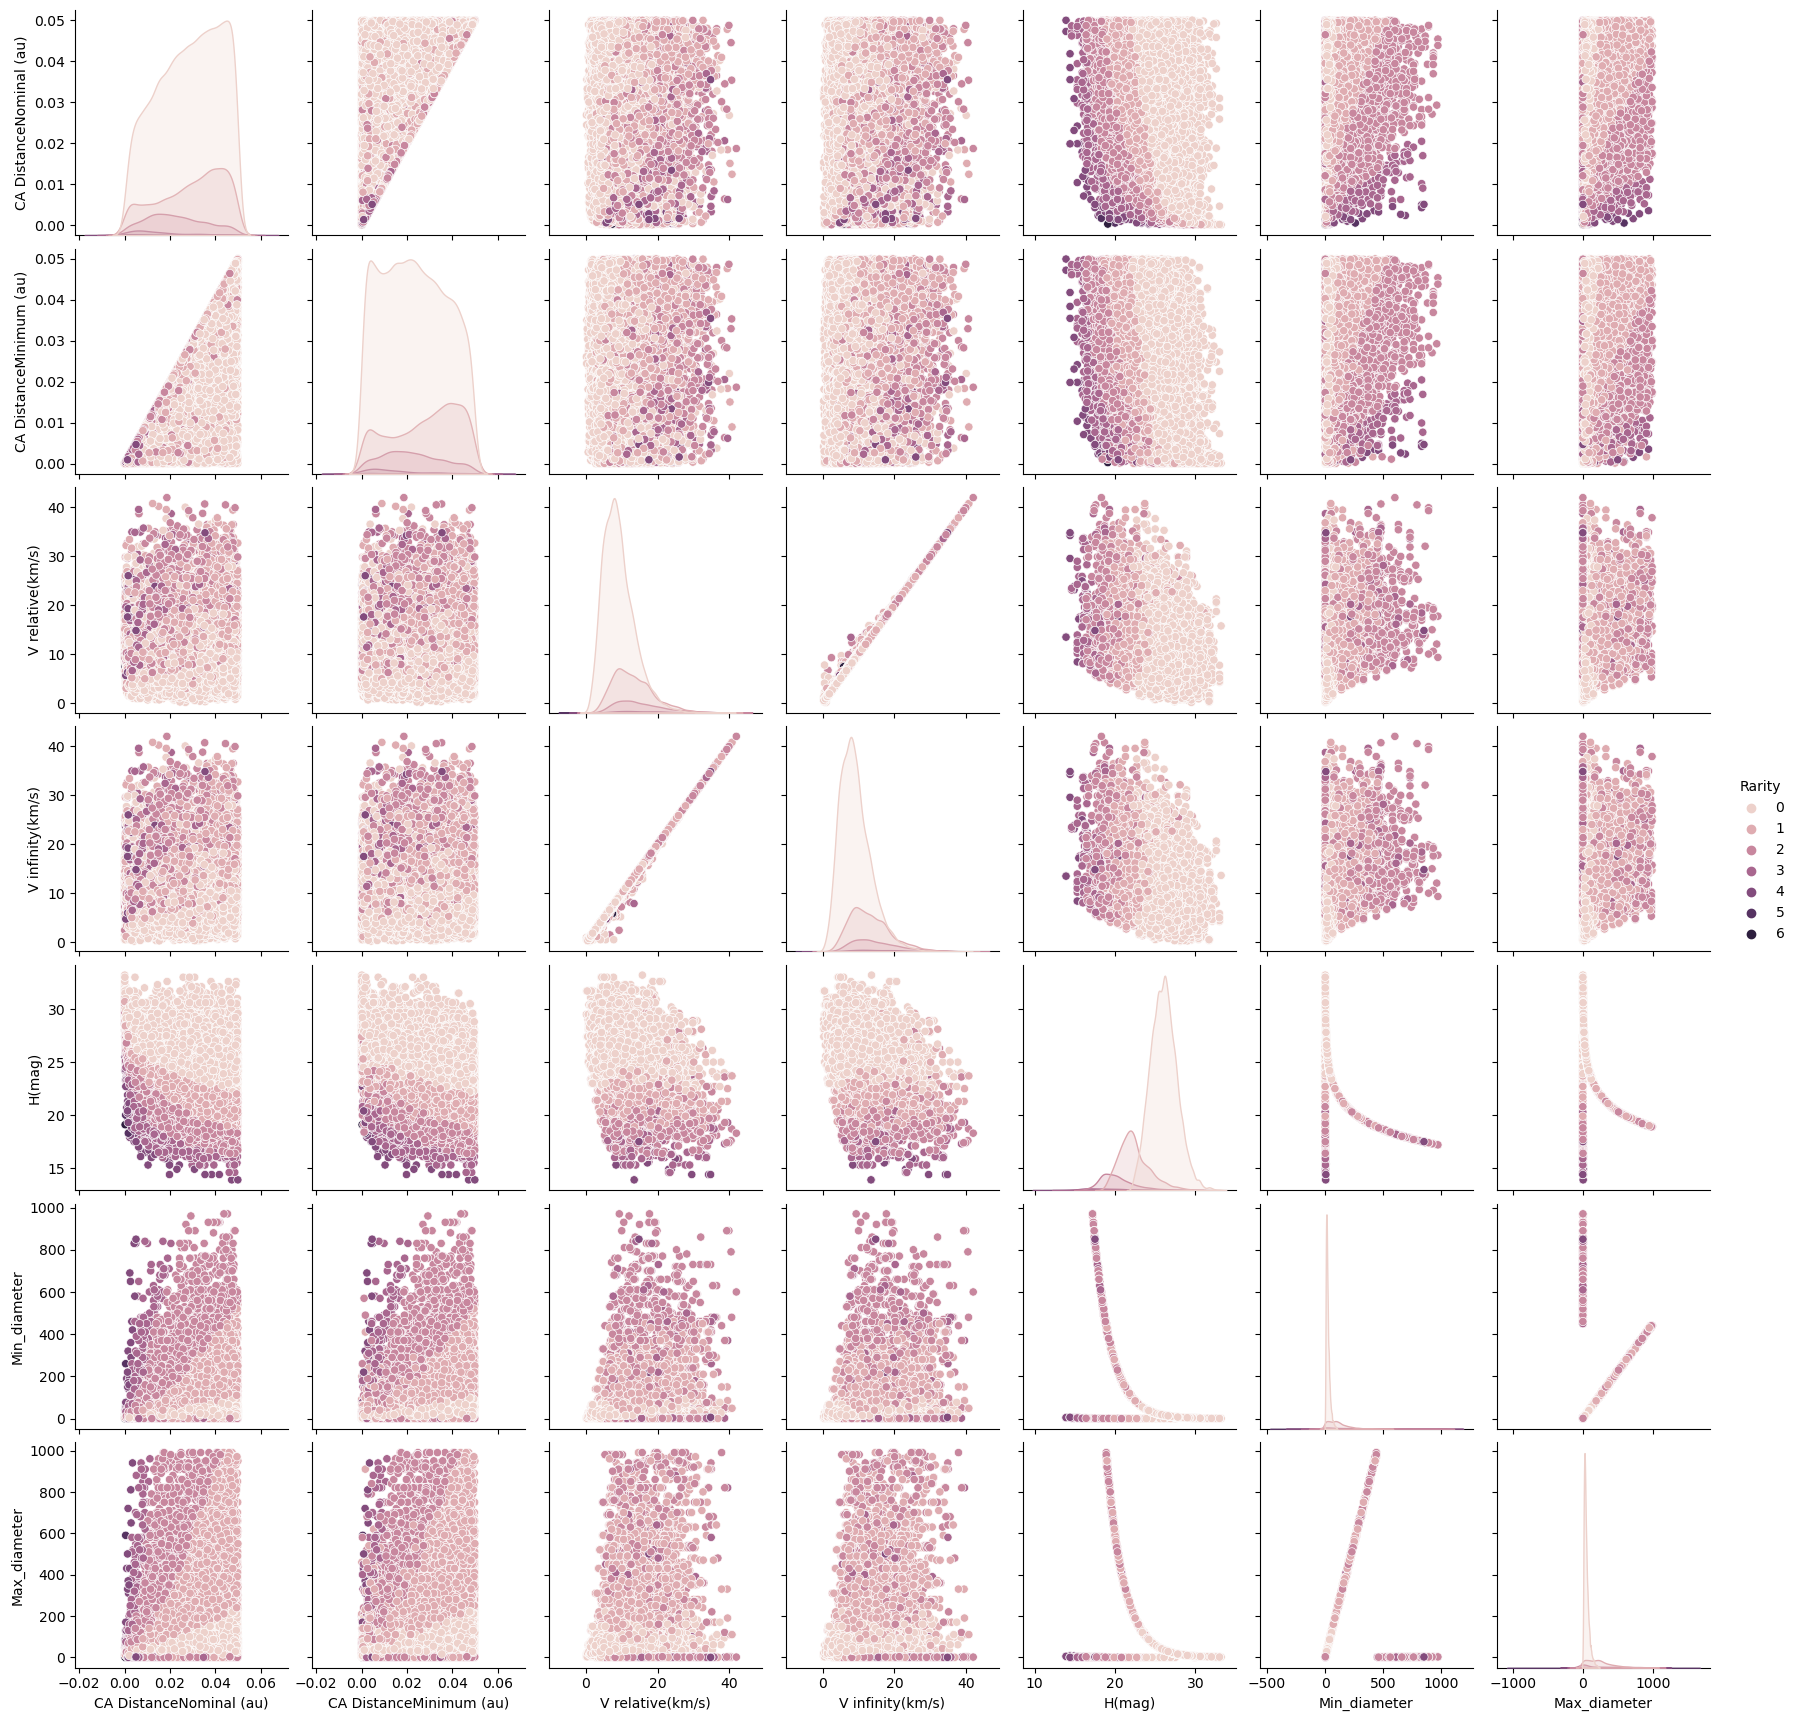

In [ ]:
sns.pairplot(data = raw_data, hue = "Rarity")

Se hace un poco complicado diferenciar con escala de colores de una misma gama, se procederá a graficar con colores:

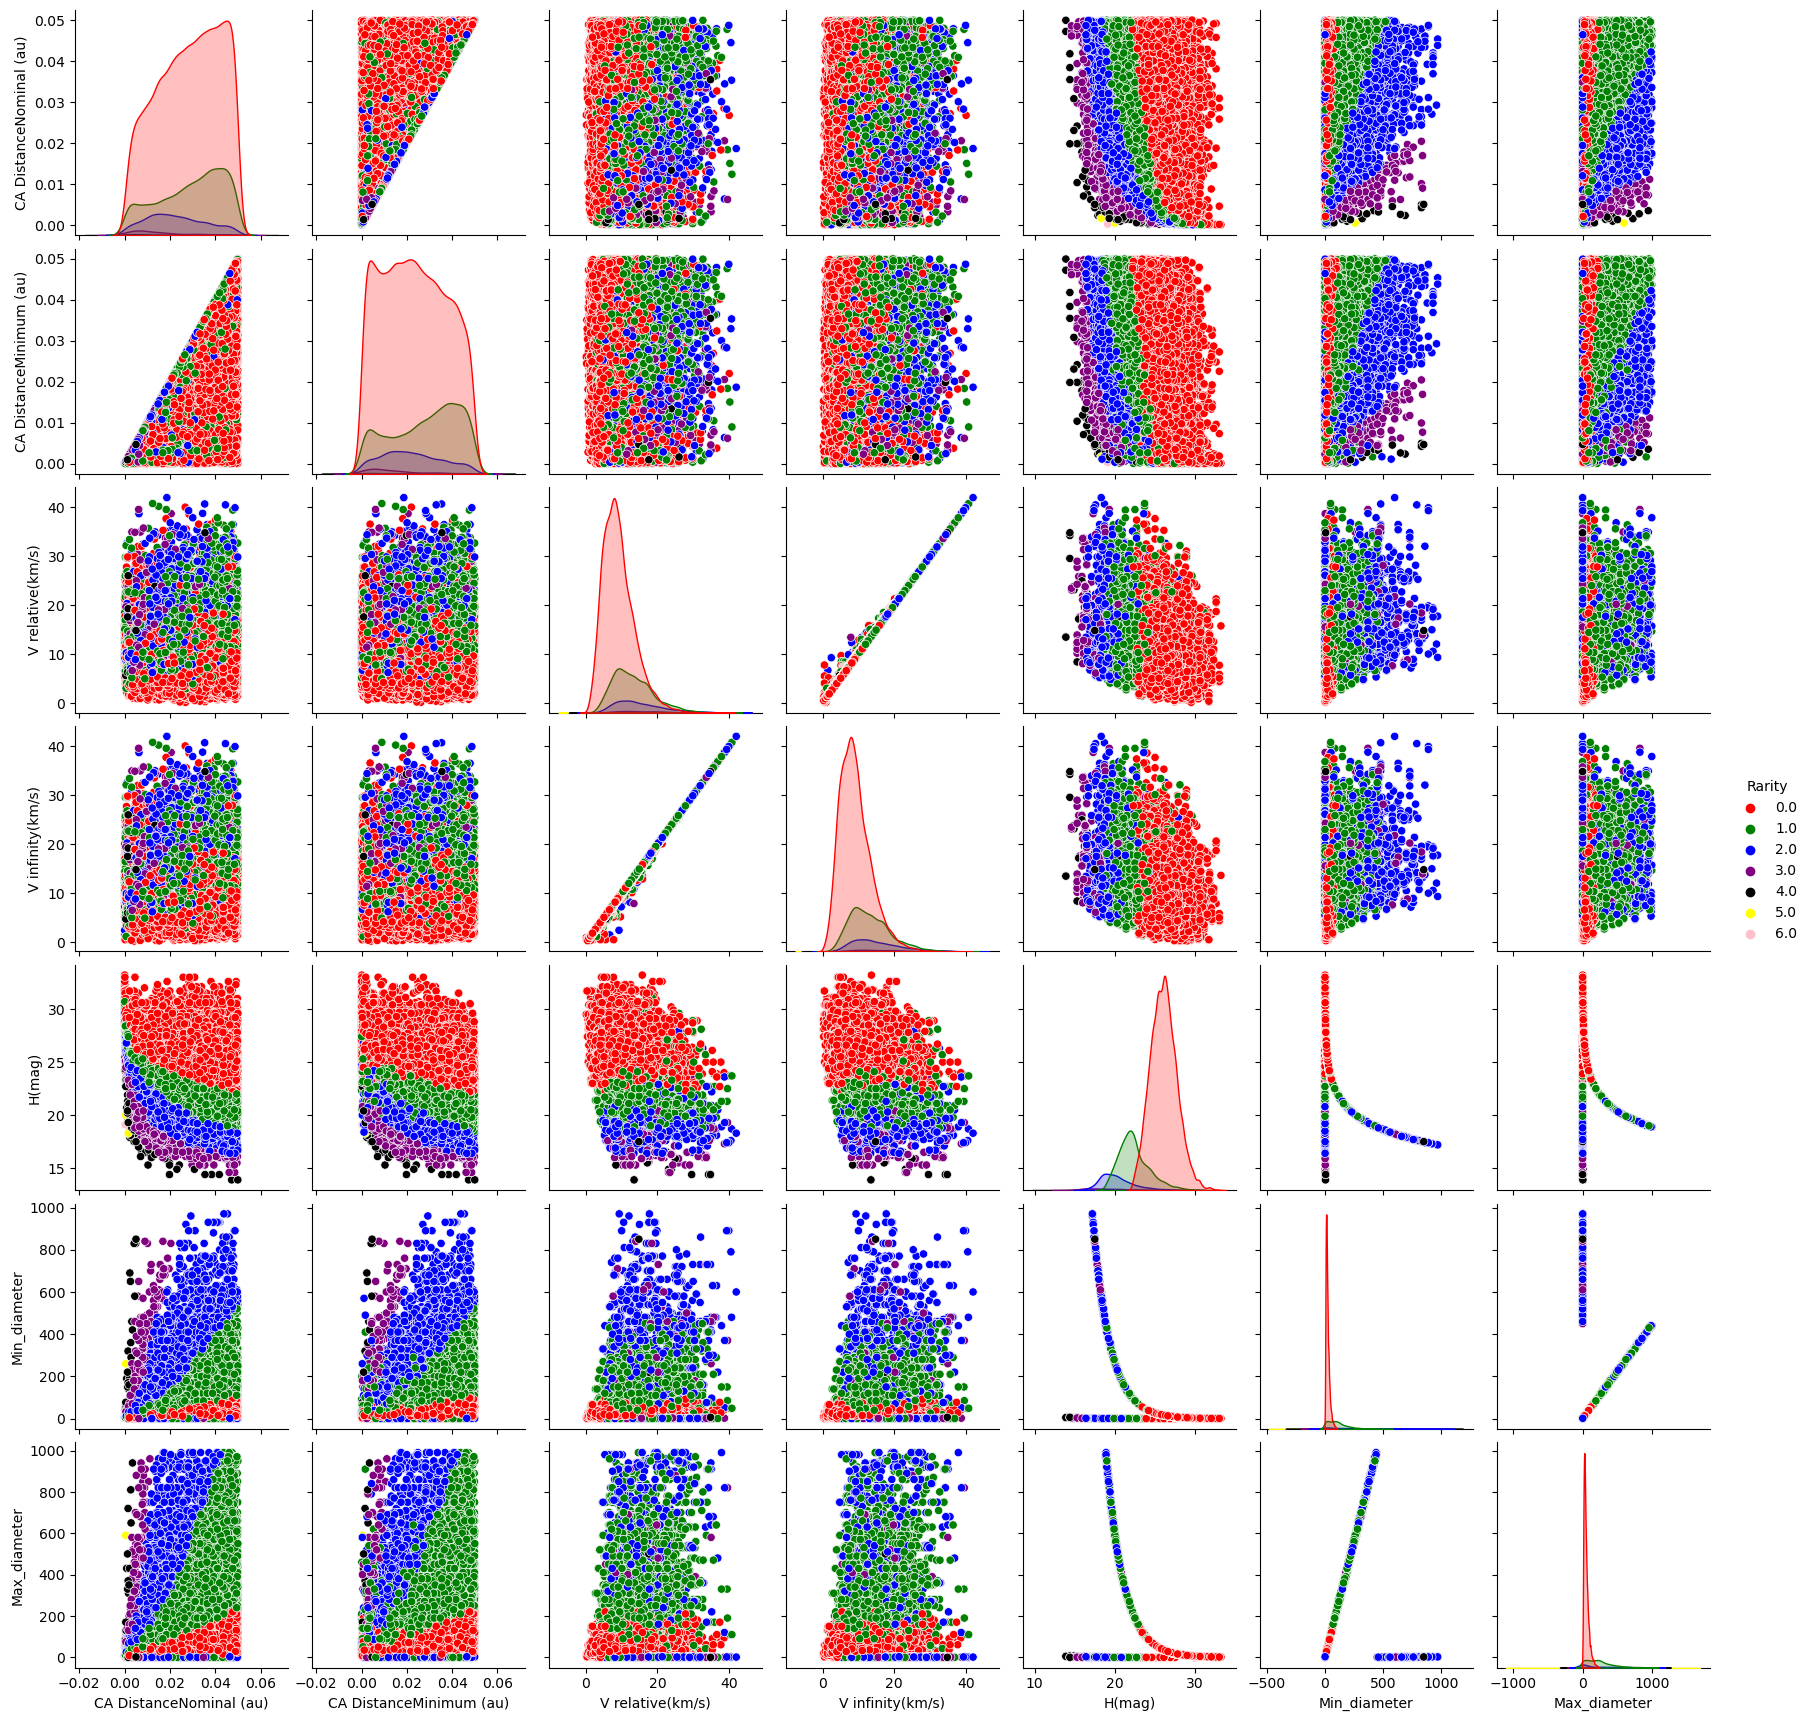

In [ ]:
# Define a custom color palette
custom_palette = ["red", "green", "blue", "purple", "black", "yellow", "pink"]


# Plot using custom palette
sns.pairplot(data=raw_data, hue="Rarity", palette=custom_palette)

# Show the plot
plt.show()

In [ ]:
# ¿Rarity y cómo se distribuyen los ast?
raw_data.groupby(["Rarity"]).count()

Object  Close-Approach (CA) Date  CA DistanceNominal (au)  \
Rarity                                                              
0.0      26028                     26028                    26028   
1.0       7203                      7203                     7203   
2.0       2269                      2269                     2269   
3.0        337                       337                      337   
4.0         51                        51                       51   
5.0          2                         2                        2   
6.0          1                         1                        1   

        CA DistanceMinimum (au)  V relative(km/s)  V infinity(km/s)  H(mag)  \
Rarity                                                                        
0.0                       26028             26028             26028   26028   
1.0                        7203              7203              7203    7203   
2.0                        2269              2269              2269    2269   
3.0                         337               337               337     337   
4.0                          51                51                51      51   
5.0                           2                 2                 2       2   
6.0                           1                 1                 1       1   

        Diameter  Min_diameter  Max_diameter   Unit  
Rarity                                               
0.0        26028         26028         26028  26028  
1.0         7203          7203          7203   7203  
2.0         2269          2269          2269   2269  
3.0          337           337           337    337  
4.0           51            51            51     51  
5.0            2             2             2      2  
6.0            1             1             1      1

Observamos cómo se distribuyen por rarity. Prestando atención, se puede ver el color rojo, azul, verde como los más destacables y distinguibles, luego púrpura y negro, en menor medida rosado y amarillo. Esto es lógico debido a la cantidad de datos pertenecientes a cada frecuencia.

Una medida de cuán poco frecuente es el acercamiento cercano a la Tierra para asteroides del mismo tamaño y más grandes: 0 significa una frecuencia promedio de 100 por año, es decir, aproximadamente cada pocos días o menos, 1 corresponde a aproximadamente una vez al mes, 2 a aproximadamente una vez al año, de 3 a aproximadamente una vez por década, etc. 'n/a' significa que no se dispone de una estimación de frecuencia. Ver nota para más detalles.

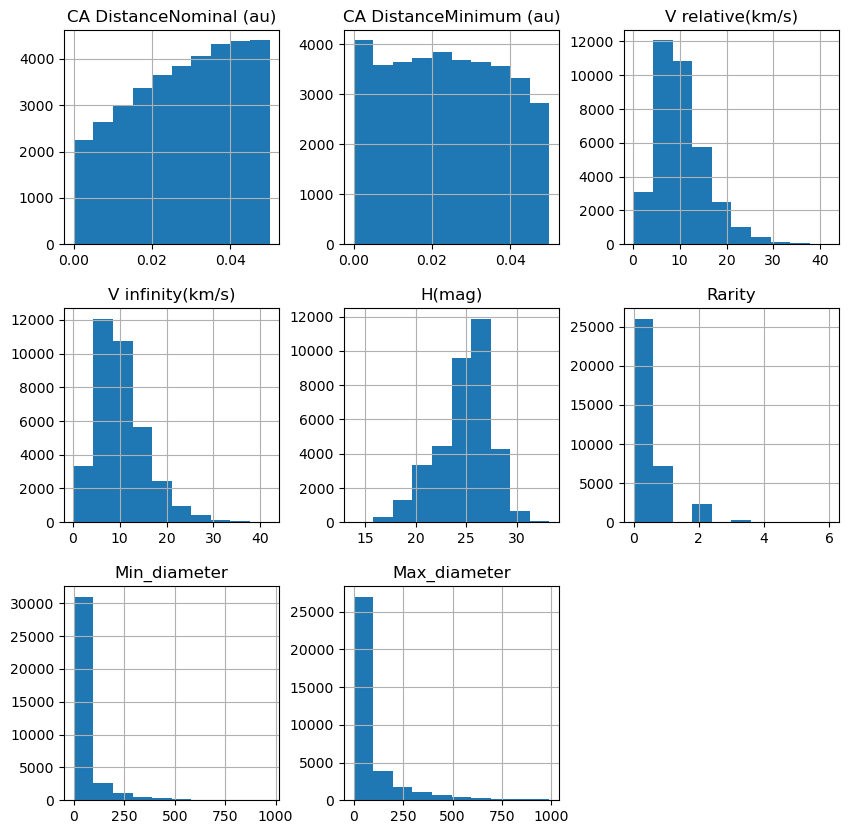

In [ ]:
flag = False
raw_data.hist(figsize=(10, 10))
plt.show()
flag = True

Los distintos histogramas nos muestran distribuciones hacia los extremos, ya sea con picos de datos en su extremo derecha ó izquierda. En las gráficas como V relative(km/s), V infinity(km/s), Rarity, Min_diameter y Miax_diameter podríamos decir que siguen una distribución sesgada a la izquierda, los datos se concentran a la izquierda de la distribución. El histograma del dato rarity nos muestra que los valores están mayormente distribuidos entre los valores 0 (sobretodo) y 1; en menor medida 2, 3 y 4.

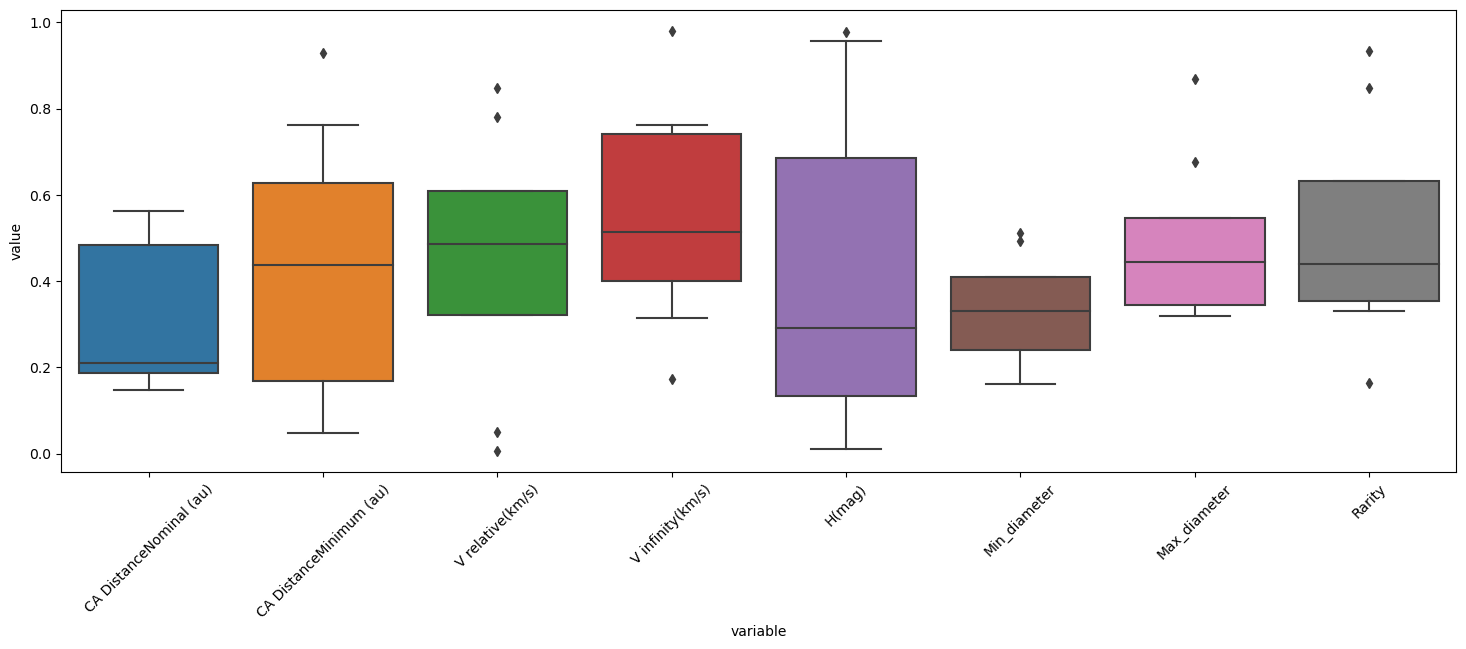

In [ ]:
plt.figure(figsize=(18, 6))
df = pd.DataFrame(data = np.random.random(size=(8,8)), columns = ['CA DistanceNominal (au)','CA DistanceMinimum (au)','V relative(km/s)','V infinity(km/s)','H(mag)','Min_diameter','Max_diameter','Rarity'])

sns.boxplot(x="variable", y="value", data=pd.melt(df), whis=0.5)
plt.xticks(rotation=45)
plt.show()


En cuanto a detección de outlyers, el boxplot es un instrumento muy astuto y no se fía de los valores muy muy grandes o los valores muy muy pequeños. Los calificará como raros y como sabemos los pinta con puntos.

Para distinguir si son valores raros o outliers el boxplot utiliza una regla sencilla. Cualquier valor que sea más grande que 1.5 veces la distancia de la caja + cuartil 3 es un valor muy muy grande. El bloxplot lo considerará un valor extraño o outlier. Lo dibujará con una cruz o un puntito.

También para los valores muy muy pequeños. Cualquier valor de la variable que sea menor que el cuartil 1 menos la distancia de la caja, el boxplot lo considerará un valor muy muy pequeño. Será un valor raro o outlier. Lo dibujará con puntos.

En los diferentes casos, vemos outliers para Rarity en valores mínimos y máximos. 

Seguiremos analizando en profundidad a través de un análisis de correlación.

/tmp/ipykernel_14318/2966309710.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), annot = True)


<AxesSubplot: >

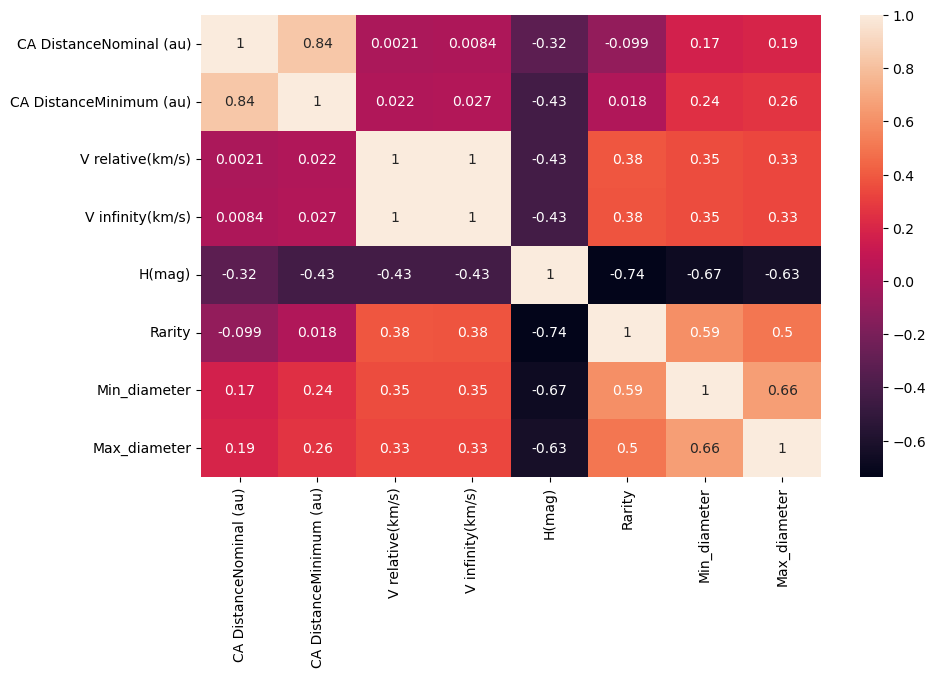

In [ ]:
# Correlación entre las variables del dataset con la clase Rarity
plt.figure(figsize = (10, 6))
sns.heatmap(raw_data.corr(), annot = True)

En este caso vemos baja correlación entre las variables, exceptuando entre las variables "V relative(km/s)" y "V infinity(km/s)" . Y también entre las distancias mínimas y nominales. En cuanto a la variable Rarity los valores que aparente mayor correlación representan son con Min_diameter/Max_diameter, pero sin ser significante.

Vamos a representar la correlación entre estas variables con mayor correlación:

'CA DistanceNominal (au)','CA DistanceMinimum (au)','V relative(km/s)','','H(mag)','Min_diameter','Max_diameter','Rarity'

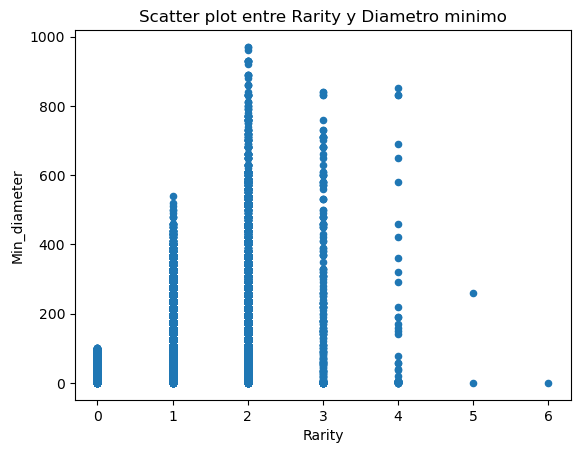

In [ ]:
raw_data.plot.scatter(x='Rarity', y='Min_diameter', title= "Scatter plot entre Rarity y Diametro minimo")
plt.show(block=True)

En este diagrama no se presenta una aparente relación lineal positiva, los puntos no forman ningún patrón aparentemente positivo lineal. Por lo que se podría descartar correlación.

La correlación es una medida para describir el alcance de una relación entre dos variables. La causalidad, por otro lado, es la relación entre causa y efecto entre dos variables.

Incluso si hemos observado una correlación (no en este caso), no podemos concluir que una variable provoca un cambio en la otra. A menos que hayamos podido considerar todas las variantes diferentes, debemos suponer que todavía existe una posibilidad de coincidencia o que un tercer factor podría estar causando que nuestras dos variables cambien.

Por lo que, siempre es importante realizar un experimento más completo antes de sacar conclusiones finales con respecto a las cifras de correlación.

In [ ]:
# Librerías mínimas para redes neuronales
import tensorflow as tf
import pandas as pd
import numpy as np

# Eliminamos el warning de asociación
pd.options.mode.chained_assignment = None

# Mezcla de los datos
asteroidsClean = raw_data.sample(frac = 1)

El argumento frac especifica la fracción de filas que se van a seleccionar al azar. En este caso, frac = 1 significa que se seleccionan todas las filas, lo que equivale a mezclar todas las filas del DataFrame. Esto es comúnmente utilizado para barajar los datos y eliminar cualquier sesgo que pueda haber en los datos.

In [ ]:
asteroidsClean

Object      Close-Approach (CA) Date  \
11790          (2011 SC16)  2011-Sep-25 10:53 ±    00:48   
33667            (2019 VV)  2155-Mar-06 22:31 ±    01:11   
8225            (2013 KS1)   1993-Sep-09 09:11 ± < 00:01   
24679          (2014 BP43)   2046-Feb-10 15:46 ± 8_10:17   
29012          (2022 UA13)   2088-Oct-27 03:21 ± 3_11:11   
...                    ...                           ...   
2505            (2000 WC1)   1934-Nov-13 23:35 ± < 00:01   
33315           (2022 EV1)   2148-Mar-13 09:05 ± 3_01:06   
4556   490581 (2009 WZ104)  1956-Dec-04 23:11 ±    00:02   
20212           (2021 TF1)  2021-Oct-01 20:58 ±    00:02   
11849           (2011 WO2)  2011-Nov-07 00:40 ±    00:16   

       CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
11790                  0.04600                  0.04546              4.36   
33667                  0.03254                  0.02797              8.17   
8225                   0.03648                  0.03648              9.75   
24679                  0.02101                  0.01333              6.78   
29012                  0.02508                  0.00119             14.88   
...                        ...                      ...               ...   
2505                   0.04887                  0.04885             10.61   
33315                  0.03629                  0.03224              8.85   
4556                   0.04838                  0.04837              6.79   
20212                  0.01490                  0.01487             14.92   
11849                  0.01916                  0.01880             14.38   

       V infinity(km/s)  H(mag)        Diameter  Rarity  Min_diameter  \
11790              4.35    27.4  8.8 m -   20 m     0.0         8.800   
33667              8.16    25.3   23 m -   51 m     0.0        23.000   
8225               9.75    26.8   11 m -   26 m     0.0        11.000   
24679              6.76    26.5   13 m -   30 m     0.0        13.000   
29012             14.87    26.4   14 m -   32 m     0.0        14.000   
...                 ...     ...             ...     ...           ...   
2505              10.60    22.2   97 m -  220 m     0.0        97.000   
33315              8.84    26.1   16 m -   36 m     0.0        16.000   
4556               6.79    20.9  0.237±0.004 km     1.0         0.237   
20212             14.90    25.9   17 m -   39 m     0.0        17.000   
11849             14.37    25.4   22 m -   49 m     0.0        22.000   

       Max_diameter Unit  
11790        20.000    m  
33667        51.000    m  
8225         26.000    m  
24679        30.000    m  
29012        32.000    m  
...             ...  ...  
2505        220.000    m  
33315        36.000    m  
4556          0.004   km  
20212        39.000    m  
11849        49.000    m  

[35891 rows x 12 columns]

## Modelo 1

Usaremos función sigmoid, aunque debería usar función Softmax para multiclase, pero probaremos con Sigmoid (Ya que lo había ejecutado con esta función de activación.)


In [ ]:
# Extracción de las variables numéricas
numericAsteroids = asteroidsClean[["CA DistanceNominal (au)", "CA DistanceMinimum (au)", "V relative(km/s)", "V infinity(km/s)", "H(mag)", "Min_diameter", "Max_diameter", "Rarity"]]

In [ ]:
# Librería de codificación
from sklearn.preprocessing import LabelEncoder
objectEncoder = LabelEncoder()
rarityEncoder = LabelEncoder()

numericAsteroids['objectEncoder'] = objectEncoder.fit_transform(asteroidsClean['Object'])
numericAsteroids['rarityEncoder'] = rarityEncoder.fit_transform(asteroidsClean['Rarity'])

# Aplicación de one-hot encode para la multiclase
numericAsteroids = pd.concat([numericAsteroids, pd.get_dummies(asteroidsClean["Rarity"])], axis = 1)
numericAsteroids.head()

numericAsteroids

CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
11790                  0.04600                  0.04546              4.36   
33667                  0.03254                  0.02797              8.17   
8225                   0.03648                  0.03648              9.75   
24679                  0.02101                  0.01333              6.78   
29012                  0.02508                  0.00119             14.88   
...                        ...                      ...               ...   
2505                   0.04887                  0.04885             10.61   
33315                  0.03629                  0.03224              8.85   
4556                   0.04838                  0.04837              6.79   
20212                  0.01490                  0.01487             14.92   
11849                  0.01916                  0.01880             14.38   

       V infinity(km/s)  H(mag)  Min_diameter  Max_diameter  Rarity  \
11790              4.35    27.4         8.800        20.000     0.0   
33667              8.16    25.3        23.000        51.000     0.0   
8225               9.75    26.8        11.000        26.000     0.0   
24679              6.76    26.5        13.000        30.000     0.0   
29012             14.87    26.4        14.000        32.000     0.0   
...                 ...     ...           ...           ...     ...   
2505              10.60    22.2        97.000       220.000     0.0   
33315              8.84    26.1        16.000        36.000     0.0   
4556               6.79    20.9         0.237         0.004     1.0   
20212             14.90    25.9        17.000        39.000     0.0   
11849             14.37    25.4        22.000        49.000     0.0   

       objectEncoder  rarityEncoder  0.0  1.0  2.0  3.0  4.0  5.0  6.0  
11790           2374              0    1    0    0    0    0    0    0  
33667           8123              0    1    0    0    0    0    0    0  
8225            3041              0    1    0    0    0    0    0    0  
24679           3304              0    1    0    0    0    0    0    0  
29012          12494              0    1    0    0    0    0    0    0  
...              ...            ...  ...  ...  ...  ...  ...  ...  ...  
2505             148              0    1    0    0    0    0    0    0  
33315          11701              0    1    0    0    0    0    0    0  
4556           13653              1    0    1    0    0    0    0    0  
20212          10836              0    1    0    0    0    0    0    0  
11849           2446              0    1    0    0    0    0    0    0  

[35891 rows x 17 columns]

In [ ]:
grouped_data = numericAsteroids.groupby('rarityEncoder').mean()
grouped_data

CA DistanceNominal (au)  CA DistanceMinimum (au)  \
rarityEncoder                                                     
0                             0.028236                 0.023306   
1                             0.028927                 0.027649   
2                             0.022765                 0.022270   
3                             0.015359                 0.015159   
4                             0.010430                 0.010401   
5                             0.001080                 0.001080   
6                             0.000250                 0.000250   

               V relative(km/s)  V infinity(km/s)     H(mag)  Min_diameter  \
rarityEncoder                                                                
0                      9.140168          9.112811  26.039680     20.983945   
1                     13.175503         13.146045  22.370068    107.456123   
2                     15.080410         15.040256  20.277567    226.987480   
3                     16.255875         16.190208  18.910979    155.115976   
4                     18.345294         18.202549  18.276471    154.195059   
5                     15.070000         14.855000  19.150000    130.466000   
6                      7.420000          5.840000  19.100000      0.340000   

               Max_diameter  Rarity  objectEncoder  0.0  1.0  2.0  3.0  4.0  \
rarityEncoder                                                                 
0                 46.895999     0.0    6841.015599  1.0  0.0  0.0  0.0  0.0   
1                237.247923     1.0    6431.308344  0.0  1.0  0.0  0.0  0.0   
2                261.007202     2.0    9271.953724  0.0  0.0  1.0  0.0  0.0   
3                138.050706     3.0   10899.854599  0.0  0.0  0.0  1.0  0.0   
4                128.611843     4.0   11345.411765  0.0  0.0  0.0  0.0  1.0   
5                295.005500     5.0   10228.000000  0.0  0.0  0.0  0.0  0.0   
6                  0.040000     6.0   13840.000000  0.0  0.0  0.0  0.0  0.0   

               5.0  6.0  
rarityEncoder            
0              0.0  0.0  
1              0.0  0.0  
2              0.0  0.0  
3              0.0  0.0  
4              0.0  0.0  
5              1.0  0.0  
6              0.0  1.0

In [ ]:
data = numericAsteroids.iloc[:, :-7].values
labels = numericAsteroids.iloc[:, -7:].values
print(data[0])
print(labels[0])

[4.600e-02 4.546e-02 4.360e+00 4.350e+00 2.740e+01 8.800e+00 2.000e+01
 0.000e+00 2.374e+03 0.000e+00]
[1 0 0 0 0 0 0]


In [ ]:
# Normalizació de los datos para mejorar el funcionamiento de la red neuronal
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
# Partición en entrenamiento/validación manualmente
split = int(data.shape[0] * 0.8)

X_train, Y_train = data[:split, :], labels[:split]
X_test, Y_test = data[split:, :], labels[split:]

# Transformamos los datos para hacerlos adecuados 
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

# Definimos el modelo secuencial
model = tf.keras.models.Sequential()

# Definimos el tamaño de entrada
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
#######
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#######
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                704       
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.001
epochs = 10
batch_size = 128

# Categorical cross entropy for multiclass, MAE, RMSE, MAPE... https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
180/180 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9953 - val_loss: 0.0081 - val_accuracy: 0.9981
Epoch 2/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9986 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9998
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 6/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 7/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %.3f' %acc)
print('Test Loss: %.3f' %loss)

225/225 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9996
Test Accuracy: 1.000
Test Loss: 0.005


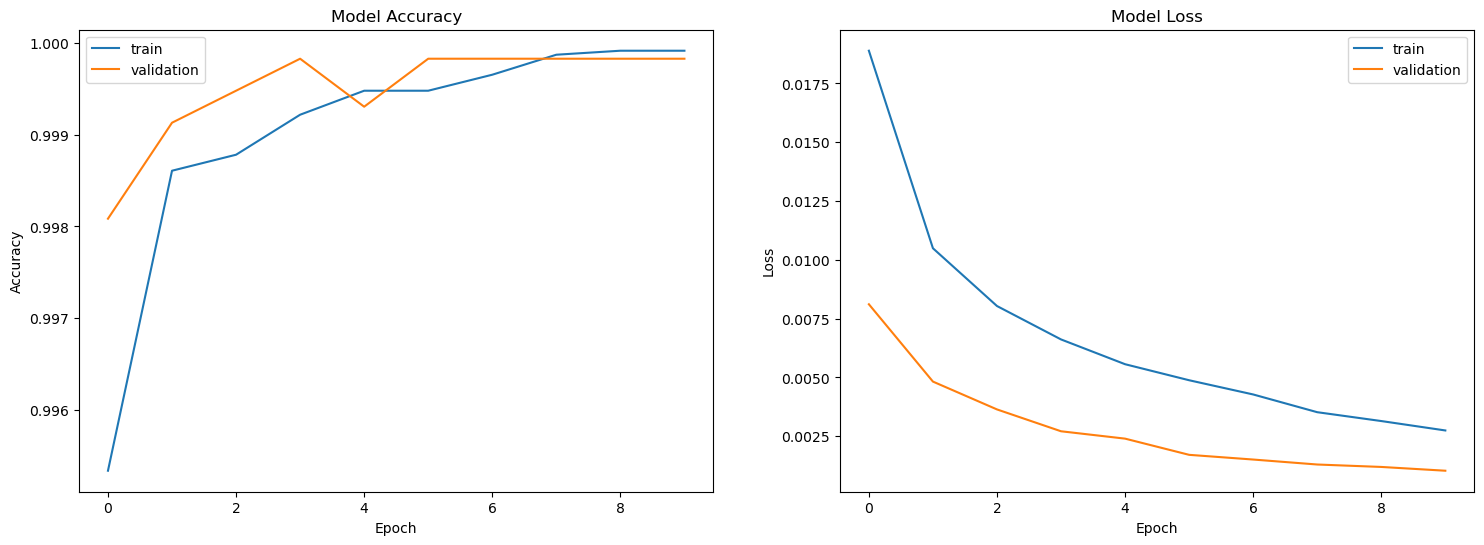

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])

La precisión del primer modelo nos muestra que en los primeros epochs el modelo está aprendiendo y logra estabilizarsea parti del epoch 6. El entrenamiento comenzó con una pérdida inicial de 0,0189 y una precisión de 0,9953. A medida que avanzaba el entrenamiento, la pérdida disminuyó y la precisión aumentó, lo que indica que la red neuronal estaba aprendiendo a hacer mejores predicciones. Al final del entrenamiento, la pérdida fue de 0,0027 y la precisión fue de 0,9999. La pérdida de validación y la precisión también mejoraron a medida que avanzaba el entrenamiento, lo que indica que la red neuronal no se sobreajustó a los datos de entrenamiento.
Se podría afirmar que el historial de entrenamiento sugiere que la red neuronal pudo aprender los patrones en los datos y hacer predicciones precisas.

225/225 [==============================] - 0s 1ms/step


<AxesSubplot: >

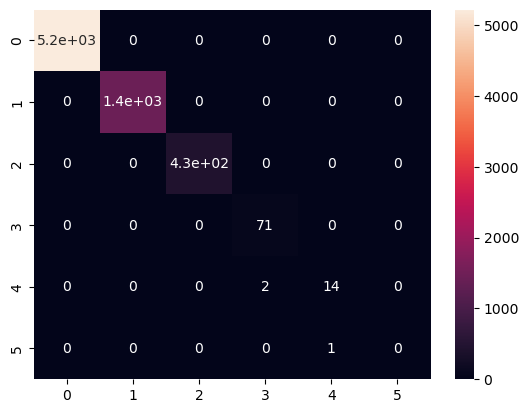

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


yTest = model.predict(X_test)

predClasses = np.argmax(yTest,axis=1)
yTestTrue = np.argmax(Y_test, axis = 1)

sns.heatmap(confusion_matrix(yTestTrue, predClasses), annot = True)



En cuanto a la matriz de confusión:
Las filas de la matriz representan las clases predichas de los asteroides y las columnas representan las verdaderas clases de los asteroides.

Se predijo que todas las muestras en la clase 0, 1 y 2 reales estarían en la clase 0, 1 y 2 previstas. 
71 muestras en la clase 3 real, todas las cuales se predijo que estarían en la clase 3 prevista, 2 de las cuales se predijo incorrectamente que estarían en la clase 4 
14 muestras se predijo correctament en la clase 4, 1 se predijo incorrectamente que estaría en la clase 5.
No hubo muestras en la clase 5 real, por lo que no hubo predicciones para esta clase. Tampoco fueron dibujadas las columnas pertenecientes a clase 6, seguramente el modelo está clasificando incorrectamente algunos asteroides de estas clases, lo que podría deberse a la cantidad limitada de muestras en estas clases.
En general, parece que el modelo está haciendo un buen trabajo en la predicción de las clases, pero podría mejorar en la predicción de muestras en la clase 5 y 6. 

## Modelo 2

Realizo un Modelo 2 cambiando función de activación a Softmax, multiclase. Se cambia también función de pérdida a mean_absolute_error que calcula la media de la diferencia absoluta entre etiquetas y predicciones, porque quería validar el error medio absoluto de la categorización entre etiquetas y la predicción del modelo. (No estoy muy segura si esta combinación en el modelo dará buenos resultados y si es la apropiada para el modelo, me cuesta entender aún ciertos conceptos y parámetros, veremos...)

In [ ]:
# Extracción de las variables numéricas
numericAsteroids2 = asteroidsClean[["CA DistanceNominal (au)", "CA DistanceMinimum (au)", "V relative(km/s)", "V infinity(km/s)", "H(mag)", "Min_diameter", "Max_diameter", "Rarity"]]

In [ ]:
# Librería de codificación
from sklearn.preprocessing import LabelEncoder
objectEncoder = LabelEncoder()
rarityEncoder = LabelEncoder()

numericAsteroids2['objectEncoder'] = objectEncoder.fit_transform(asteroidsClean['Object'])
numericAsteroids2['rarityEncoder'] = rarityEncoder.fit_transform(asteroidsClean['Rarity'])

# Aplicación de one-hot encode para la multiclase
numericAsteroids2 = pd.concat([numericAsteroids, pd.get_dummies(asteroidsClean["Rarity"])], axis = 1)
numericAsteroids2.head()

numericAsteroids2

CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
11790                  0.04600                  0.04546              4.36   
33667                  0.03254                  0.02797              8.17   
8225                   0.03648                  0.03648              9.75   
24679                  0.02101                  0.01333              6.78   
29012                  0.02508                  0.00119             14.88   
...                        ...                      ...               ...   
2505                   0.04887                  0.04885             10.61   
33315                  0.03629                  0.03224              8.85   
4556                   0.04838                  0.04837              6.79   
20212                  0.01490                  0.01487             14.92   
11849                  0.01916                  0.01880             14.38   

       V infinity(km/s)  H(mag)  Min_diameter  Max_diameter  Rarity  0.0  1.0  \
11790              4.35    27.4         8.800        20.000     0.0    1    0   
33667              8.16    25.3        23.000        51.000     0.0    1    0   
8225               9.75    26.8        11.000        26.000     0.0    1    0   
24679              6.76    26.5        13.000        30.000     0.0    1    0   
29012             14.87    26.4        14.000        32.000     0.0    1    0   
...                 ...     ...           ...           ...     ...  ...  ...   
2505              10.60    22.2        97.000       220.000     0.0    1    0   
33315              8.84    26.1        16.000        36.000     0.0    1    0   
4556               6.79    20.9         0.237         0.004     1.0    0    1   
20212             14.90    25.9        17.000        39.000     0.0    1    0   
11849             14.37    25.4        22.000        49.000     0.0    1    0   

       2.0  3.0  4.0  5.0  6.0  
11790    0    0    0    0    0  
33667    0    0    0    0    0  
8225     0    0    0    0    0  
24679    0    0    0    0    0  
29012    0    0    0    0    0  
...    ...  ...  ...  ...  ...  
2505     0    0    0    0    0  
33315    0    0    0    0    0  
4556     0    0    0    0    0  
20212    0    0    0    0    0  
11849    0    0    0    0    0  

[35891 rows x 15 columns]

In [ ]:
data = numericAsteroids2.iloc[:, :-7].values
labels = numericAsteroids2.iloc[:, -7:].values
print(data[0])
print(labels[0])

[ 0.046    0.04546  4.36     4.35    27.4      8.8     20.       0.     ]
[1 0 0 0 0 0 0]


In [ ]:
# Normalizació de los datos para mejorar el funcionamiento de la red neuronal
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
# Partición en entrenamiento/validación manualmente
split = int(data.shape[0] * 0.8)

X_train, Y_train = data[:split, :], labels[:split]
X_test, Y_test = data[split:, :], labels[split:]

# Transformamos los datos para hacerlos adecuados 
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

# Definimos el modelo secuencial
model = tf.keras.models.Sequential()

# Definimos el tamaño de entrada
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
#######
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#######
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                576       
                                                                 
 dense_19 (Dense)            (None, 8)                 520       
                                                                 
 dense_20 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.001
epochs = 10
batch_size = 128

# Categorical cross entropy for multiclass, MAE, RMSE, MAPE... https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['mean_absolute_error'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
180/180 [==============================] - 2s 4ms/step - loss: 0.9397 - mean_absolute_error: 0.3830 - val_loss: 0.2720 - val_mean_absolute_error: 0.2735
Epoch 2/10
180/180 [==============================] - 1s 6ms/step - loss: 0.1956 - mean_absolute_error: 0.2492 - val_loss: 0.1326 - val_mean_absolute_error: 0.2344
Epoch 3/10
180/180 [==============================] - 1s 3ms/step - loss: 0.1136 - mean_absolute_error: 0.2276 - val_loss: 0.0797 - val_mean_absolute_error: 0.2203
Epoch 4/10
180/180 [==============================] - 1s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.2143 - val_loss: 0.0482 - val_mean_absolute_error: 0.2095
Epoch 5/10
180/180 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_absolute_error: 0.2038 - val_loss: 0.0325 - val_mean_absolute_error: 0.2003
Epoch 6/10
180/180 [==============================] - 0s 3ms/step - loss: 0.0304 - mean_absolute_error: 0.1980 - val_loss: 0.0214 - val_mean_absolute_error: 0.1961
Epoch 7/10
180/1

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %.3f' %acc)
print('Test Loss: %.3f' %loss)

225/225 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_absolute_error: 0.2109
Test Accuracy: 0.211
Test Loss: 0.012


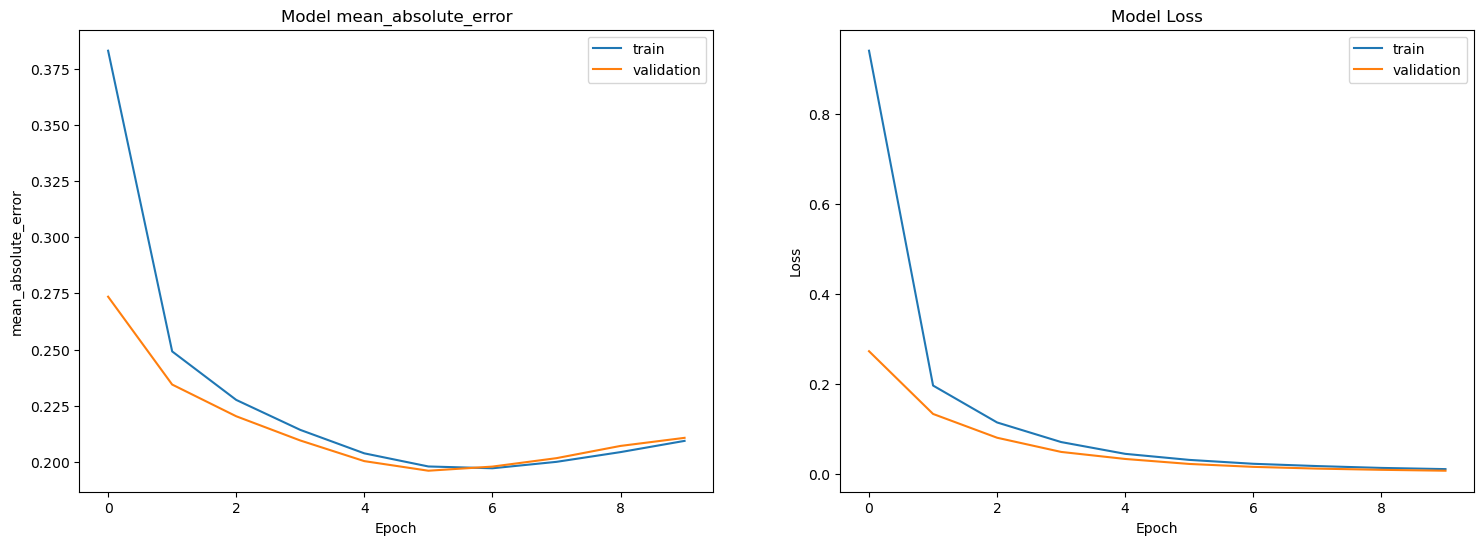

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['mean_absolute_error'])
ax1.plot(history.history['val_mean_absolute_error'])
ax1.title.set_text('Model mean_absolute_error')
ax1.set_ylabel('mean_absolute_error')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])

El modelo comienza con una gran pérdida de entrenamiento y mean_absolute_error en la primera epoch, pero estos disminuyen significativamente a medida que el modelo continúa aprendiendo en las próximas epochs. Las métricas de validación también mejoran con el tiempo, lo que indica que el modelo está aprendiendo mejor en los nuevos datos. Al final del entrenamiento, el modelo logra una baja pérdida de validación y mean_absolute_error, lo que sugiere que es capaz de predecir con precisión las variables objetivos en datos nuevos que no conoce.

225/225 [==============================] - 0s 1ms/step


<AxesSubplot: >

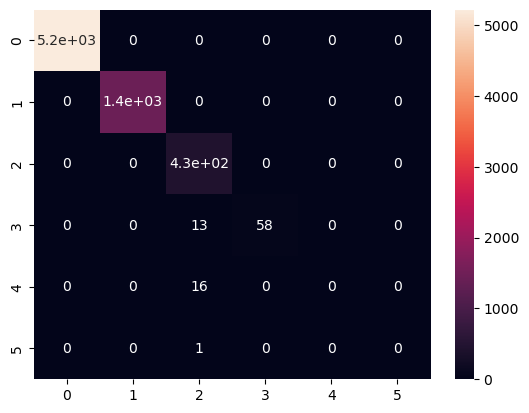

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


yTest = model.predict(X_test)

predClasses = np.argmax(yTest,axis=1)
yTestTrue = np.argmax(Y_test, axis = 1)

sns.heatmap(confusion_matrix(yTestTrue, predClasses), annot = True)

En cuanto a la matriz de confusión:
Las filas de la matriz representan las clases predichas de los asteroides y las columnas representan las verdaderas clases de los asteroides.

Se predijo que todas las muestras en la clase 0, 1 y 2 reales estarían en la clase 0, 1 y 2 previstas. 
58 muestras en la clase 3 real, todas las cuales se predijo que estarían en la clase 3 prevista.
No hubo muestras en las clases 4, 5 ni 6 reales, por lo que no hubo predicciones para estas clase. Como especifiqué anteriormente, podría deberse a la cantidad limitada de muestras en estas clases. Sin embargo aún me pregunto por qué no está mostrando la clase 6 por más que sus datos sean pocos. (Los datos ya fueron revisados y no encuentro el error.)
En general, parece que el modelo está haciendo un buen trabajo en la predicción de las clases, pero podría mejorar en la predicción de muestras en la clases con menor cantidad de datos. 

## Modelo 3

Realizo un Modelo 3 siguiendo con función de activación a Softmax, multiclase. Se cambia también función de pérdida a accuracy. En este caso se incrementarán los número de epochs.

In [ ]:
# Extracción de las variables numéricas
numericAsteroids3 = asteroidsClean[["CA DistanceNominal (au)", "CA DistanceMinimum (au)", "V relative(km/s)", "V infinity(km/s)", "H(mag)", "Min_diameter", "Max_diameter", "Rarity"]]

In [ ]:
# Librería de codificación
from sklearn.preprocessing import LabelEncoder
objectEncoder = LabelEncoder()
rarityEncoder = LabelEncoder()

numericAsteroids3['objectEncoder'] = objectEncoder.fit_transform(asteroidsClean['Object'])
numericAsteroids3['rarityEncoder'] = rarityEncoder.fit_transform(asteroidsClean['Rarity'])

# Aplicación de one-hot encode para la multiclase
numericAsteroids3 = pd.concat([numericAsteroids, pd.get_dummies(asteroidsClean["Rarity"])], axis = 1)
numericAsteroids3.head()

numericAsteroids3

CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
11790                  0.04600                  0.04546              4.36   
33667                  0.03254                  0.02797              8.17   
8225                   0.03648                  0.03648              9.75   
24679                  0.02101                  0.01333              6.78   
29012                  0.02508                  0.00119             14.88   
...                        ...                      ...               ...   
2505                   0.04887                  0.04885             10.61   
33315                  0.03629                  0.03224              8.85   
4556                   0.04838                  0.04837              6.79   
20212                  0.01490                  0.01487             14.92   
11849                  0.01916                  0.01880             14.38   

       V infinity(km/s)  H(mag)  Min_diameter  Max_diameter  Rarity  0.0  1.0  \
11790              4.35    27.4         8.800        20.000     0.0    1    0   
33667              8.16    25.3        23.000        51.000     0.0    1    0   
8225               9.75    26.8        11.000        26.000     0.0    1    0   
24679              6.76    26.5        13.000        30.000     0.0    1    0   
29012             14.87    26.4        14.000        32.000     0.0    1    0   
...                 ...     ...           ...           ...     ...  ...  ...   
2505              10.60    22.2        97.000       220.000     0.0    1    0   
33315              8.84    26.1        16.000        36.000     0.0    1    0   
4556               6.79    20.9         0.237         0.004     1.0    0    1   
20212             14.90    25.9        17.000        39.000     0.0    1    0   
11849             14.37    25.4        22.000        49.000     0.0    1    0   

       2.0  3.0  4.0  5.0  6.0  
11790    0    0    0    0    0  
33667    0    0    0    0    0  
8225     0    0    0    0    0  
24679    0    0    0    0    0  
29012    0    0    0    0    0  
...    ...  ...  ...  ...  ...  
2505     0    0    0    0    0  
33315    0    0    0    0    0  
4556     0    0    0    0    0  
20212    0    0    0    0    0  
11849    0    0    0    0    0  

[35891 rows x 15 columns]

In [ ]:
data = numericAsteroids3.iloc[:, :-7].values
labels = numericAsteroids3.iloc[:, -7:].values
print(data[0])
print(labels[0])

[ 0.046    0.04546  4.36     4.35    27.4      8.8     20.       0.     ]
[1 0 0 0 0 0 0]


In [ ]:
# Normalizació de los datos para mejorar el funcionamiento de la red neuronal
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
# Partición en entrenamiento/validación manualmente
split = int(data.shape[0] * 0.8)

X_train, Y_train = data[:split, :], labels[:split]
X_test, Y_test = data[split:, :], labels[split:]

# Transformamos los datos para hacerlos adecuados 
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

# Definimos el modelo secuencial
model = tf.keras.models.Sequential()

# Definimos el tamaño de entrada
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
#######
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#######
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                576       
                                                                 
 dense_25 (Dense)            (None, 8)                 520       
                                                                 
 dense_26 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.001
epochs = 20
batch_size = 128

# Categorical cross entropy for multiclass, MAE, RMSE, MAPE... https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
180/180 [==============================] - 1s 4ms/step - loss: 0.7318 - accuracy: 0.8269 - val_loss: 0.2105 - val_accuracy: 0.9549
Epoch 2/20
180/180 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9687 - val_loss: 0.1087 - val_accuracy: 0.9791
Epoch 3/20
180/180 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9811 - val_loss: 0.0668 - val_accuracy: 0.9871
Epoch 4/20
180/180 [==============================] - 1s 4ms/step - loss: 0.0622 - accuracy: 0.9884 - val_loss: 0.0449 - val_accuracy: 0.9923
Epoch 5/20
180/180 [==============================] - 1s 5ms/step - loss: 0.0440 - accuracy: 0.9914 - val_loss: 0.0333 - val_accuracy: 0.9951
Epoch 6/20
180/180 [==============================] - 1s 5ms/step - loss: 0.0332 - accuracy: 0.9939 - val_loss: 0.0249 - val_accuracy: 0.9958
Epoch 7/20
180/180 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9949 - val_loss: 0.0193 - val_accuracy: 0.9962
Epoch 

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %.3f' %acc)
print('Test Loss: %.3f' %loss)

225/225 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9985
Test Accuracy: 0.998
Test Loss: 0.007


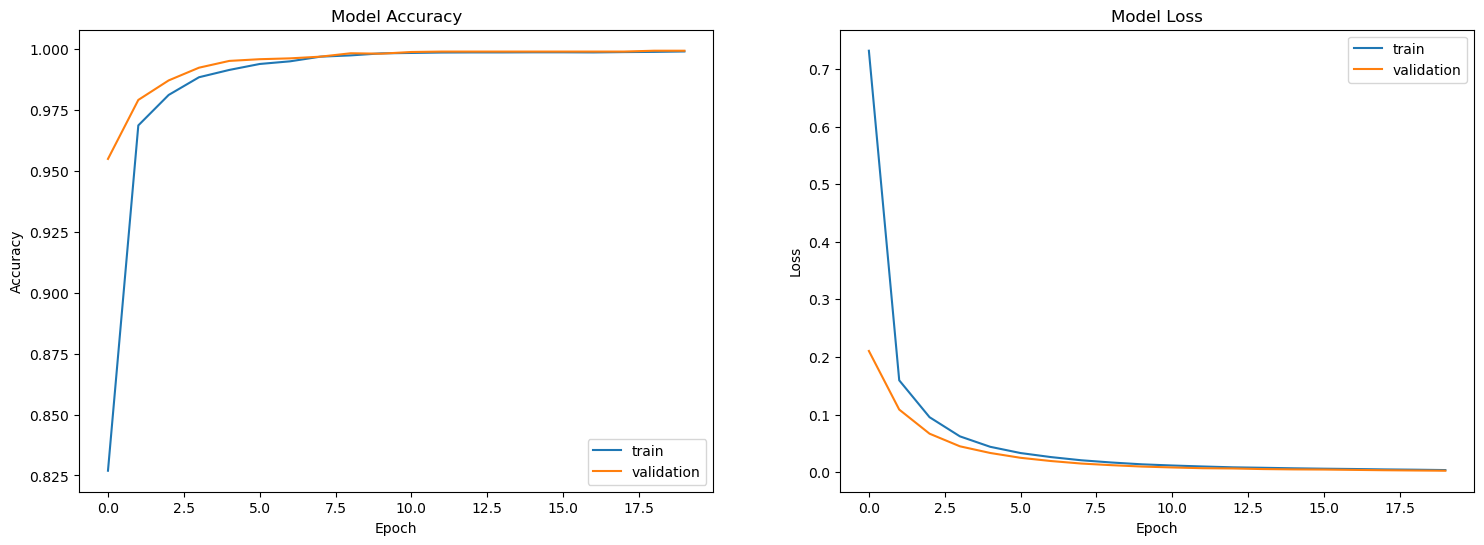

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])

El modelo empieza con una accuracy bastante alta y sigue mejorando hasta ser muy buena. El entrenamiento comenzó con una pérdida inicial de loss: 0.7318 y una precisión de 0.8269. A medida que avanzaba el entrenamiento, la pérdida disminuyó y la precisión aumentó, lo que indica que la red neuronal estaba aprendiendo a hacer aún más mejores predicciones. Al final del entrenamiento, la pérdida fue de 0.0036 y la precisión fue de 0.9990. 
Se podría afirmar que el historial de entrenamiento sugiere que la red neuronal pudo aprender los patrones en los datos y hacer predicciones precisas.

225/225 [==============================] - 0s 2ms/step


<AxesSubplot: >

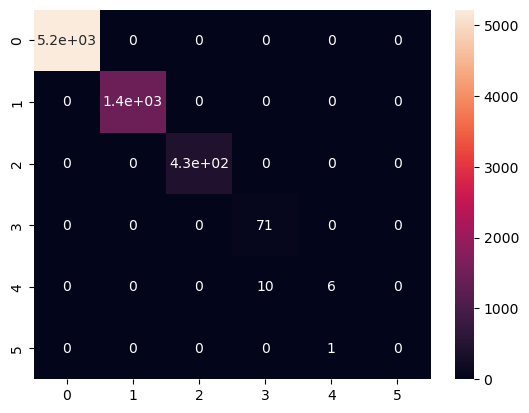

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


yTest = model.predict(X_test)

predClasses = np.argmax(yTest,axis=1)
yTestTrue = np.argmax(Y_test, axis = 1)

sns.heatmap(confusion_matrix(yTestTrue, predClasses), annot = True)

En cuanto a la matriz de confusión:
Las filas de la matriz representan las clases predichas de los asteroides y las columnas representan las verdaderas clases de los asteroides.

Se predijo que todas las muestras en la clase 0, 1 y 2 reales estarían en la clase 0, 1 y 2 previstas. 
71 muestras en la clase 3 real, todas las cuales se predijo que estarían en la clase 3 prevista. 10 en clase 4 que deberían estar en la 3.
6 muestras en la clase 4. Mejoró la predicción en clase 4. 1 en la clase 3.
No hubo muestras en las clases 5 ni 6 reales, por lo que no hubo predicciones para estas clases. 
En general, el modelo está haciendo un buen trabajo en la predicción de las clases, pero podría mejorar en la predicción de muestras en la clases con menor cantidad de datos. 

## Modelo 4

Realizo un Modelo 4 siguiendo con función de activación a Softmax, multiclase, función de pérdida a accuracy. En este caso se incrementarán los número de epochs y modificará el learning_rate = 0.05.

In [ ]:
# Extracción de las variables numéricas
numericAsteroids3 = asteroidsClean[["CA DistanceNominal (au)", "CA DistanceMinimum (au)", "V relative(km/s)", "V infinity(km/s)", "H(mag)", "Min_diameter", "Max_diameter", "Rarity"]]

In [ ]:
# Librería de codificación
from sklearn.preprocessing import LabelEncoder
objectEncoder = LabelEncoder()
rarityEncoder = LabelEncoder()

numericAsteroids3['objectEncoder'] = objectEncoder.fit_transform(asteroidsClean['Object'])
numericAsteroids3['rarityEncoder'] = rarityEncoder.fit_transform(asteroidsClean['Rarity'])

# Aplicación de one-hot encode para la multiclase
numericAsteroids3 = pd.concat([numericAsteroids, pd.get_dummies(asteroidsClean["Rarity"])], axis = 1)
numericAsteroids3.head()

numericAsteroids3

CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
11790                  0.04600                  0.04546              4.36   
33667                  0.03254                  0.02797              8.17   
8225                   0.03648                  0.03648              9.75   
24679                  0.02101                  0.01333              6.78   
29012                  0.02508                  0.00119             14.88   
...                        ...                      ...               ...   
2505                   0.04887                  0.04885             10.61   
33315                  0.03629                  0.03224              8.85   
4556                   0.04838                  0.04837              6.79   
20212                  0.01490                  0.01487             14.92   
11849                  0.01916                  0.01880             14.38   

       V infinity(km/s)  H(mag)  Min_diameter  Max_diameter  Rarity  0.0  1.0  \
11790              4.35    27.4         8.800        20.000     0.0    1    0   
33667              8.16    25.3        23.000        51.000     0.0    1    0   
8225               9.75    26.8        11.000        26.000     0.0    1    0   
24679              6.76    26.5        13.000        30.000     0.0    1    0   
29012             14.87    26.4        14.000        32.000     0.0    1    0   
...                 ...     ...           ...           ...     ...  ...  ...   
2505              10.60    22.2        97.000       220.000     0.0    1    0   
33315              8.84    26.1        16.000        36.000     0.0    1    0   
4556               6.79    20.9         0.237         0.004     1.0    0    1   
20212             14.90    25.9        17.000        39.000     0.0    1    0   
11849             14.37    25.4        22.000        49.000     0.0    1    0   

       2.0  3.0  4.0  5.0  6.0  
11790    0    0    0    0    0  
33667    0    0    0    0    0  
8225     0    0    0    0    0  
24679    0    0    0    0    0  
29012    0    0    0    0    0  
...    ...  ...  ...  ...  ...  
2505     0    0    0    0    0  
33315    0    0    0    0    0  
4556     0    0    0    0    0  
20212    0    0    0    0    0  
11849    0    0    0    0    0  

[35891 rows x 15 columns]

In [ ]:
data = numericAsteroids3.iloc[:, :-7].values
labels = numericAsteroids3.iloc[:, -7:].values
print(data[0])
print(labels[0])

[ 0.046    0.04546  4.36     4.35    27.4      8.8     20.       0.     ]
[1 0 0 0 0 0 0]


In [ ]:
# Normalizació de los datos para mejorar el funcionamiento de la red neuronal
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
# Partición en entrenamiento/validación manualmente
split = int(data.shape[0] * 0.8)

X_train, Y_train = data[:split, :], labels[:split]
X_test, Y_test = data[split:, :], labels[split:]

# Transformamos los datos para hacerlos adecuados 
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

# Definimos el modelo secuencial
model = tf.keras.models.Sequential()

# Definimos el tamaño de entrada
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
#######
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#######
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                576       
                                                                 
 dense_31 (Dense)            (None, 8)                 520       
                                                                 
 dense_32 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,159
Trainable params: 1,159
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.05
epochs = 20
batch_size = 128

# Categorical cross entropy for multiclass, MAE, RMSE, MAPE... https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
180/180 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9652 - val_loss: 0.0177 - val_accuracy: 0.9981
Epoch 2/20
180/180 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9957 - val_loss: 0.0093 - val_accuracy: 0.9986
Epoch 3/20
180/180 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9946 - val_loss: 0.0143 - val_accuracy: 0.9976
Epoch 4/20
180/180 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 5/20
180/180 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 6/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 7/20
180/180 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %.3f' %acc)
print('Test Loss: %.3f' %loss)

225/225 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9976
Test Accuracy: 0.998
Test Loss: 0.007


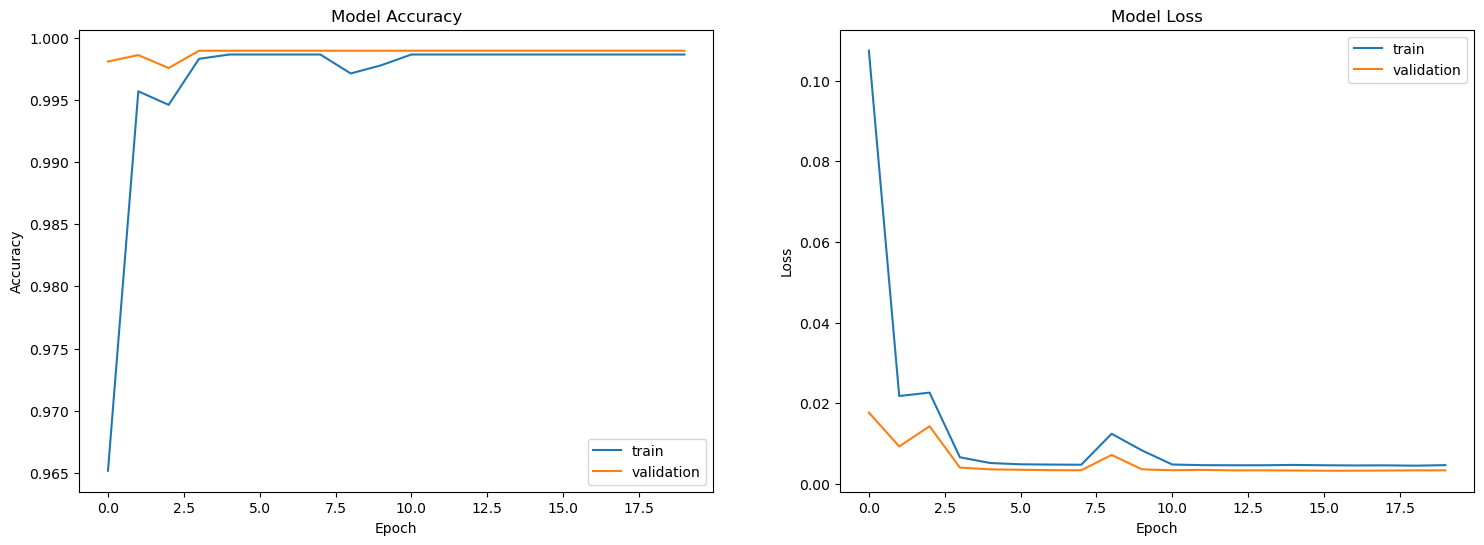

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])

El modelo tambíen tiene un outcome de precisión bastante alto a pesar de unos pequeños saltos en el epoch 7.

225/225 [==============================] - 0s 1ms/step


<AxesSubplot: >

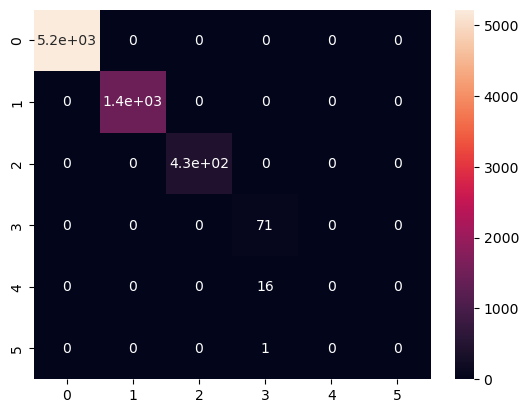

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


yTest = model.predict(X_test)

predClasses = np.argmax(yTest,axis=1)
yTestTrue = np.argmax(Y_test, axis = 1)

sns.heatmap(confusion_matrix(yTestTrue, predClasses), annot = True)

En cuanto a la matriz de confusión:
Las filas de la matriz representan las clases predichas de los asteroides y las columnas representan las verdaderas clases de los asteroides.

Se predijo que todas las muestras en la clase 0, 1 y 2 reales estarían en la clase 0, 1 y 2 previstas. 
71 muestras en la clase 3 real, todas las cuales se predijo que estarían en la clase 3 prevista. 16 en clase 4 que deberían estar en la 4 y 1 en la 5.
No hubo muestras en las clases 4, 5 ni 6 reales, por lo que no hubo predicciones para estas clases. 
En general, el modelo está haciendo un buen trabajo en la predicción de las clases, pero podría mejorar en la predicción de muestras en la clases con menor cantidad de datos. 

## Modelo 5

Se probaron modelos con cambios en sus funciones de activación, de pérdida, de epochs, learning rate pero no cambiando su arquitectura. Se realiza un último modelo donde se agrega una capa más a la red de 128.

In [ ]:
# Extracción de las variables numéricas
numericAsteroids3 = asteroidsClean[["CA DistanceNominal (au)", "CA DistanceMinimum (au)", "V relative(km/s)", "V infinity(km/s)", "H(mag)", "Min_diameter", "Max_diameter", "Rarity"]]

In [ ]:
# Librería de codificación
from sklearn.preprocessing import LabelEncoder
objectEncoder = LabelEncoder()
rarityEncoder = LabelEncoder()

numericAsteroids3['objectEncoder'] = objectEncoder.fit_transform(asteroidsClean['Object'])
numericAsteroids3['rarityEncoder'] = rarityEncoder.fit_transform(asteroidsClean['Rarity'])

# Aplicación de one-hot encode para la multiclase
numericAsteroids3 = pd.concat([numericAsteroids, pd.get_dummies(asteroidsClean["Rarity"])], axis = 1)
numericAsteroids3.head()

numericAsteroids3

CA DistanceNominal (au)  CA DistanceMinimum (au)  V relative(km/s)  \
11790                  0.04600                  0.04546              4.36   
33667                  0.03254                  0.02797              8.17   
8225                   0.03648                  0.03648              9.75   
24679                  0.02101                  0.01333              6.78   
29012                  0.02508                  0.00119             14.88   
...                        ...                      ...               ...   
2505                   0.04887                  0.04885             10.61   
33315                  0.03629                  0.03224              8.85   
4556                   0.04838                  0.04837              6.79   
20212                  0.01490                  0.01487             14.92   
11849                  0.01916                  0.01880             14.38   

       V infinity(km/s)  H(mag)  Min_diameter  Max_diameter  Rarity  0.0  1.0  \
11790              4.35    27.4         8.800        20.000     0.0    1    0   
33667              8.16    25.3        23.000        51.000     0.0    1    0   
8225               9.75    26.8        11.000        26.000     0.0    1    0   
24679              6.76    26.5        13.000        30.000     0.0    1    0   
29012             14.87    26.4        14.000        32.000     0.0    1    0   
...                 ...     ...           ...           ...     ...  ...  ...   
2505              10.60    22.2        97.000       220.000     0.0    1    0   
33315              8.84    26.1        16.000        36.000     0.0    1    0   
4556               6.79    20.9         0.237         0.004     1.0    0    1   
20212             14.90    25.9        17.000        39.000     0.0    1    0   
11849             14.37    25.4        22.000        49.000     0.0    1    0   

       2.0  3.0  4.0  5.0  6.0  
11790    0    0    0    0    0  
33667    0    0    0    0    0  
8225     0    0    0    0    0  
24679    0    0    0    0    0  
29012    0    0    0    0    0  
...    ...  ...  ...  ...  ...  
2505     0    0    0    0    0  
33315    0    0    0    0    0  
4556     0    0    0    0    0  
20212    0    0    0    0    0  
11849    0    0    0    0    0  

[35891 rows x 15 columns]

In [ ]:
data = numericAsteroids3.iloc[:, :-7].values
labels = numericAsteroids3.iloc[:, -7:].values
print(data[0])
print(labels[0])

[ 0.046    0.04546  4.36     4.35    27.4      8.8     20.       0.     ]
[1 0 0 0 0 0 0]


In [ ]:
# Normalizació de los datos para mejorar el funcionamiento de la red neuronal
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
# Partición en entrenamiento/validación manualmente
split = int(data.shape[0] * 0.8)

X_train, Y_train = data[:split, :], labels[:split]
X_test, Y_test = data[split:, :], labels[split:]

# Transformamos los datos para hacerlos adecuados 
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

# Definimos el modelo secuencial
model = tf.keras.models.Sequential()

# Definimos el tamaño de entrada
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
#######
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#######
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1152      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 8)                 520       
                                                                 
 dense_36 (Dense)            (None, 7)                 63        
                                                                 
Total params: 9,991
Trainable params: 9,991
Non-trainable params: 0
_________________________________________________________________


Vemos que se incrementó el total de parámetros de 1159 a 9991.

In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.001
epochs = 20
batch_size = 128

# Categorical cross entropy for multiclass, MAE, RMSE, MAPE... https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
180/180 [==============================] - 8s 4ms/step - loss: 0.3806 - accuracy: 0.9164 - val_loss: 0.0816 - val_accuracy: 0.9829
Epoch 2/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9901 - val_loss: 0.0245 - val_accuracy: 0.9930
Epoch 3/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0188 - accuracy: 0.9962 - val_loss: 0.0101 - val_accuracy: 0.9984
Epoch 4/20
180/180 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 0.9985 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 5/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9991
Epoch 6/20
180/180 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 7/20
180/180 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %.3f' %acc)
print('Test Loss: %.3f' %loss)

225/225 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9997
Test Accuracy: 1.000
Test Loss: 0.004


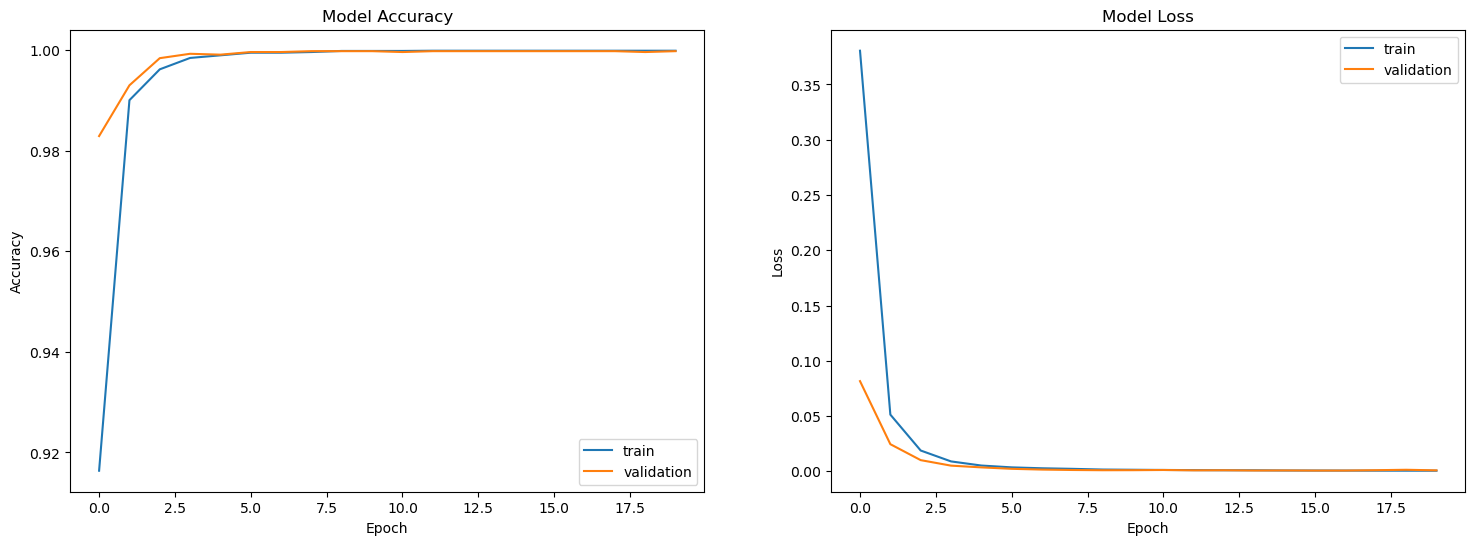

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])

El modelo tambíen tiene una precisión de  1.000 bastante alto. Por lo que podría decirse que aumentando el número de capa a uno más, la accuracy es excelente desde el nivel de los gráficos.

225/225 [==============================] - 0s 2ms/step


<AxesSubplot: >

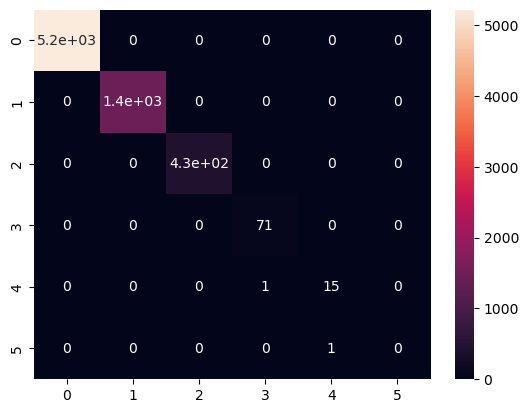

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


yTest = model.predict(X_test)

predClasses = np.argmax(yTest,axis=1)
yTestTrue = np.argmax(Y_test, axis = 1)

sns.heatmap(confusion_matrix(yTestTrue, predClasses), annot = True)

En cuanto a la matriz de confusión:
Las filas de la matriz representan las clases predichas de los asteroides y las columnas representan las verdaderas clases de los asteroides.

Se predijo que todas las muestras en la clase 0, 1 y 2 reales estarían en la clase 0, 1 y 2 previstas. 
71 muestras en la clase 3 real, todas las cuales se predijo que estarían en la clase 3 prevista. 1 en clase 4 que deberían estar en la 4.
Hubo 15 muestras en las clases 4, solo 1 en 5.
No hubo muestras para 5 ni 6 reales, por lo que no hubo predicciones para estas clases. 
En general, el modelo está haciendo un buen trabajo en la predicción de las clases, pero podría mejorar en la predicción de muestras en la clases con menor cantidad de datos. 